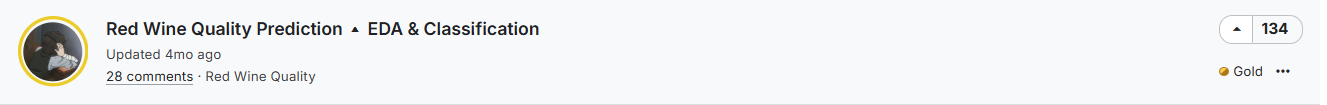

In [1]:
import os
import re
import string
import random
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from tqdm import tqdm
import lightgbm as lgbm
import missingno as msno

from sklearn.svm import SVC
import plotly.express as px
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from catboost import CatBoostClassifier
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay, auc, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(color_codes = True)   
sns.set_palette(palette = 'gist_heat', n_colors = 8)
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv('../winequality-red.csv')
df = pd.DataFrame(data)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.shape

(1599, 12)

In [5]:
def check_df(df: object, head: object = 5) -> object:

    print("\nShape")

    print(df.shape)

    print("\nTypes")

    print(df.dtypes)

    print("\nNANs")

    print(df.isnull().sum())

    print("\nInfo")

    print(df.info())

check_df(df)


Shape
(1599, 12)

Types
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

NANs
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

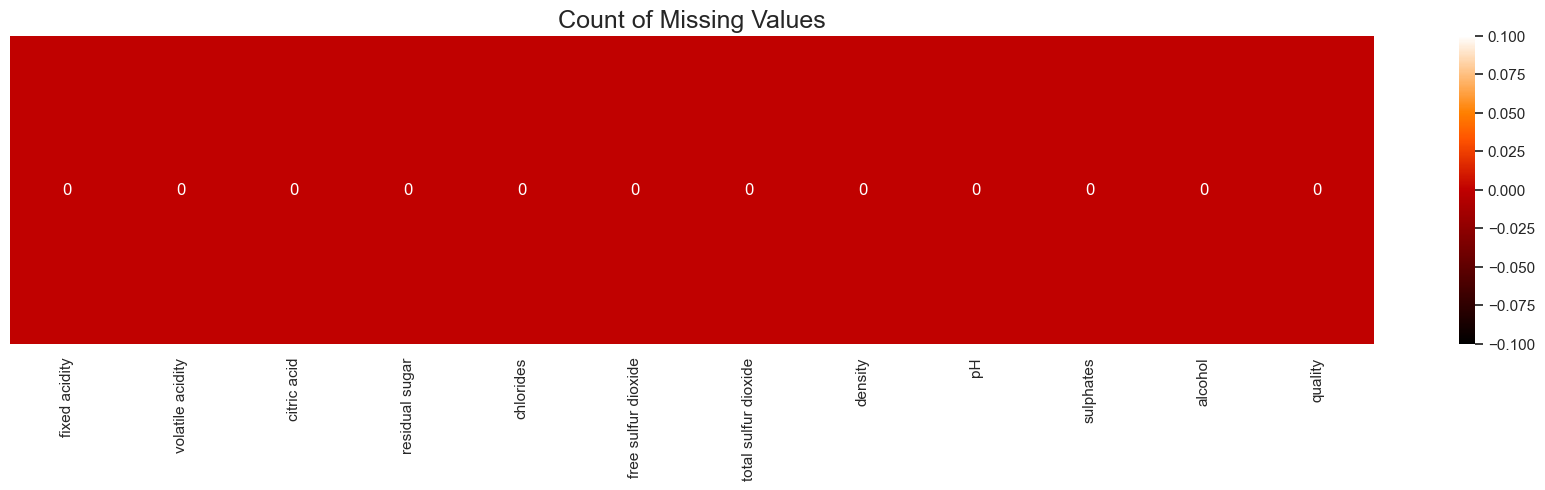

In [7]:
plt.figure(figsize=(22,4))

sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='gist_heat', annot=True,

             fmt='0.0f').set_title('Count of Missing Values', fontsize=18)

plt.show()

In [8]:
df.describe().T.style.background_gradient(cmap='RdGy', axis=1)

In [9]:
# finding unique data

df.apply(lambda x: len(x.unique()))

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [10]:
unique = df.nunique().sort_values()

unique_values = df.apply(lambda x: x.unique())

pd.DataFrame({'Number of Unique Values': unique, 'Unique Values': unique_values})

Number of Unique Values  \
alcohol                                    65   
chlorides                                 153   
citric acid                                80   
density                                   436   
fixed acidity                              96   
free sulfur dioxide                        60   
pH                                         89   
quality                                     6   
residual sugar                             91   
sulphates                                  96   
total sulfur dioxide                      144   
volatile acidity                          143   

                                                          Unique Values  
alcohol               [9.4, 9.8, 10.0, 9.5, 10.5, 9.2, 9.9, 9.1, 9.3...  
chlorides             [0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0...  
citric acid           [0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29...  
density               [0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,...  
fixed acidity         [7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,...  
free sulfur dioxide   [11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52.0...  
pH                    [3.51, 3.2, 3.26, 3.16, 3.3, 3.39, 3.36, 3.35,...  
quality                                              [5, 6, 7, 4, 8, 3]  
residual sugar        [1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ...  
sulphates             [0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8...  
total sulfur dioxide  [34.0, 67.0, 54.0, 60.0, 40.0, 59.0, 21.0, 18....  
volatile acidity      [0.7, 0.88, 0.76, 0.28, 0.66, 0.6, 0.65, 0.58,...

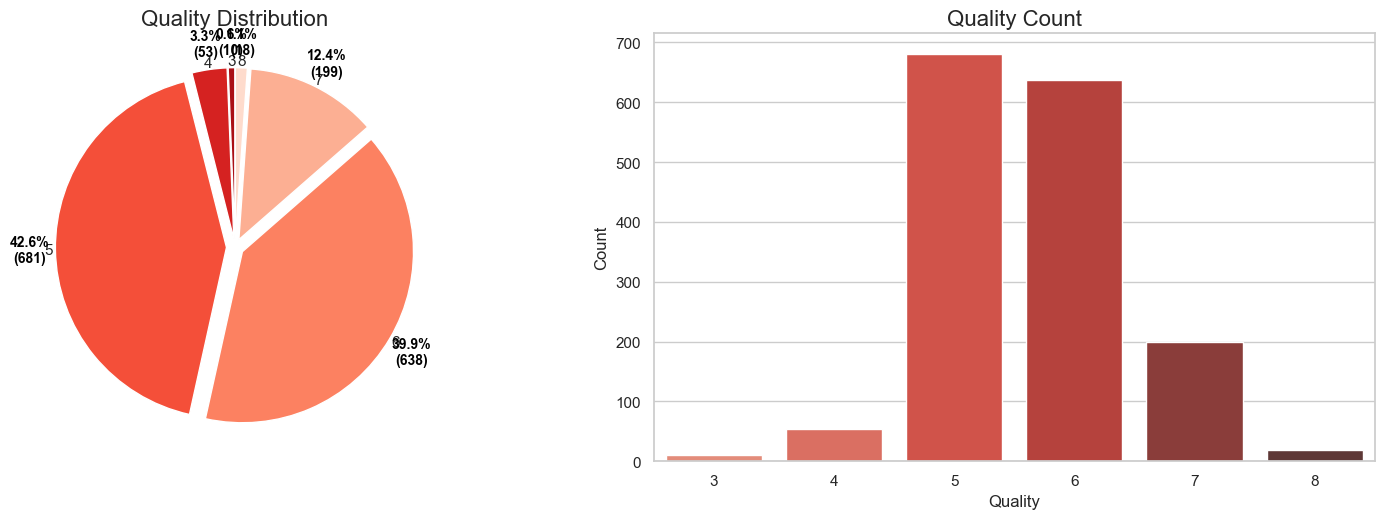

In [11]:
# Function to place labels outside the pie chart

def autopct_outside(pct, values):

    total = sum(values)

    val = int(round(pct * total / 100.0))

    return f'{pct:.1f}%\n({val})'



plt.figure(figsize=(16, 6))



# First plot - Pie chart

plt.subplot(1, 2, 1)

quality_counts = data['quality'].value_counts().sort_index()

explode = [0.05] * len(quality_counts)  # Slight separation for all slices

wedges, texts, autotexts = plt.pie(

    quality_counts,

    labels=quality_counts.index,

    colors=sns.color_palette('Reds_r', len(quality_counts)),

    autopct=lambda pct: autopct_outside(pct, quality_counts),

    startangle=90,

    explode=explode,

    pctdistance=1.15,  # Adjusts position of the percentage labels

    labeldistance=1.04  # Adjusts position of the labels

)



# Adjust label positions

for text in texts:

    text.set_horizontalalignment('center')

for autotext in autotexts:

    autotext.set_color('black')

    autotext.set_fontsize(10)

    autotext.set_weight('bold')



plt.title('Quality Distribution', fontsize=16)



# Second plot - Count plot

plt.subplot(1, 2, 2)

sns.countplot(

    data=data,

    x='quality',

    palette='Reds_d',

)

plt.title('Quality Count', fontsize=16)

plt.xlabel('Quality', fontsize=12)

plt.ylabel('Count', fontsize=12)



# General layout improvements

plt.tight_layout(pad=3.0)

plt.show()

In [12]:
df.corr(numeric_only=True).T.style.background_gradient(cmap='RdGy', axis=1)

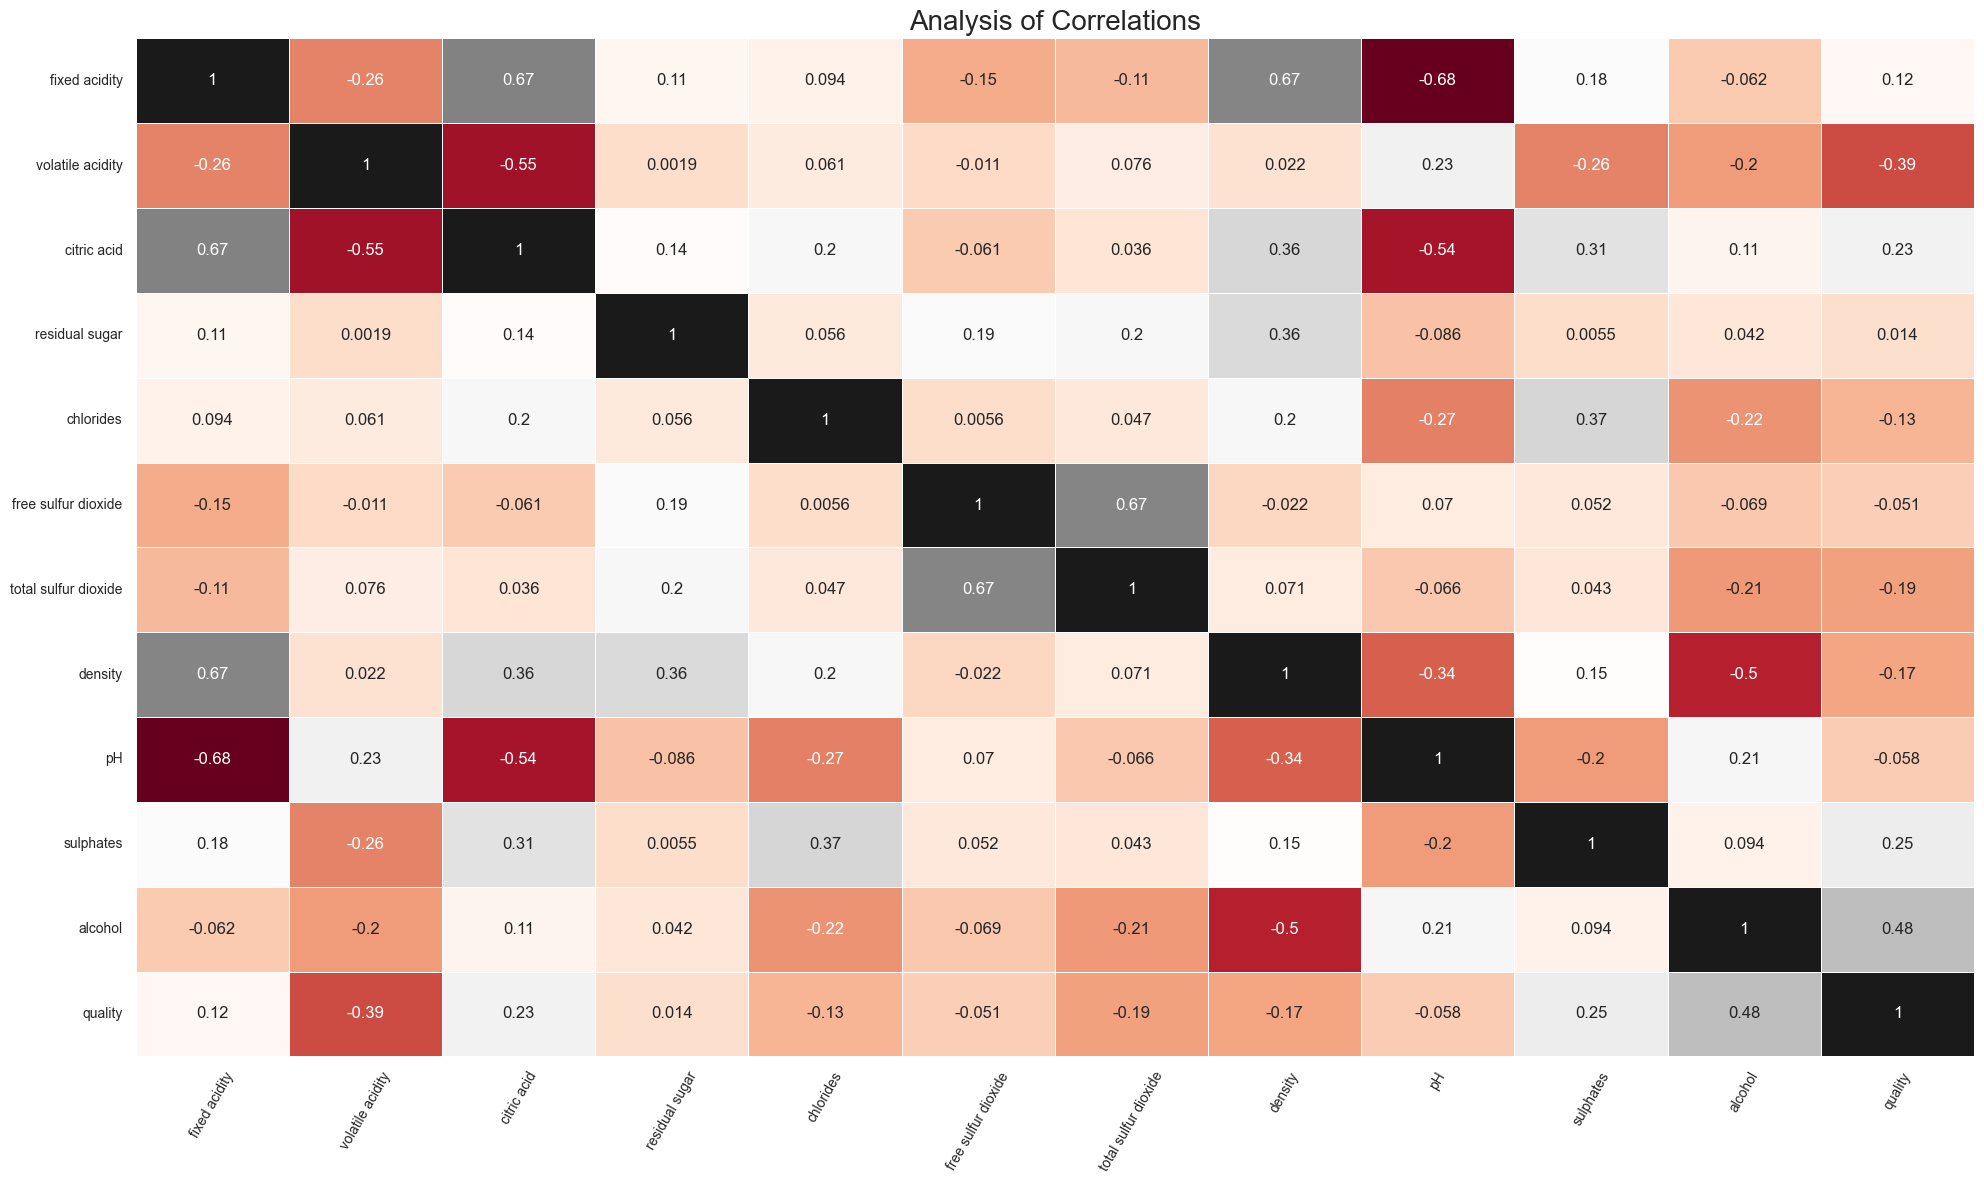

In [13]:
plt.figure(figsize=(20, 12))

sns.heatmap(df.corr(numeric_only=True), cmap="RdGy", annot=True, linewidths=.6 , cbar = False)

plt.xticks(rotation=60, size=10)

plt.yticks(size=10)

plt.title('Analysis of Correlations', size=20)

plt.tight_layout()

plt.show()

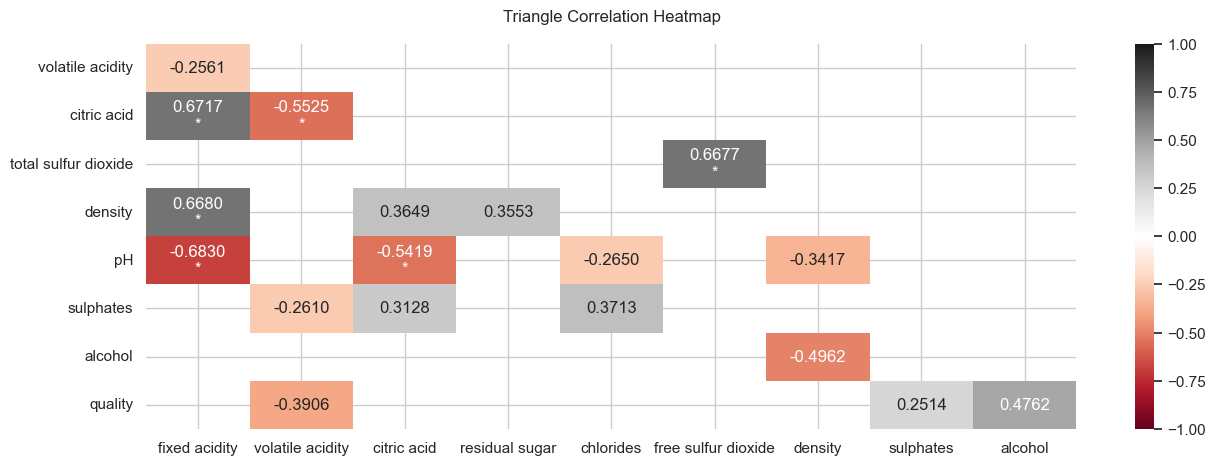

In [14]:
corr = df.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(15, 5))

mask = np.triu(np.ones_like(corr, dtype=bool))

cut_off = 0.25

extreme_1 = 0.5

extreme_2 = 0.75

extreme_3 = 0.9

mask |= np.abs(corr) < cut_off

corr = corr[~mask]

remove_empty_rows_and_cols = True

if remove_empty_rows_and_cols:

    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))

    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))

    corr = corr.iloc[wanted_cols, wanted_rows]



annot = [[f"{val:.4f}"

          + ('' if abs(val) < extreme_1 else '\n*')

          + ('' if abs(val) < extreme_2 else '*')

          + ('' if abs(val) < extreme_3 else '*')

          for val in row] for row in corr.to_numpy()]

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='RdGy')

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 12}, pad=16)

plt.show()

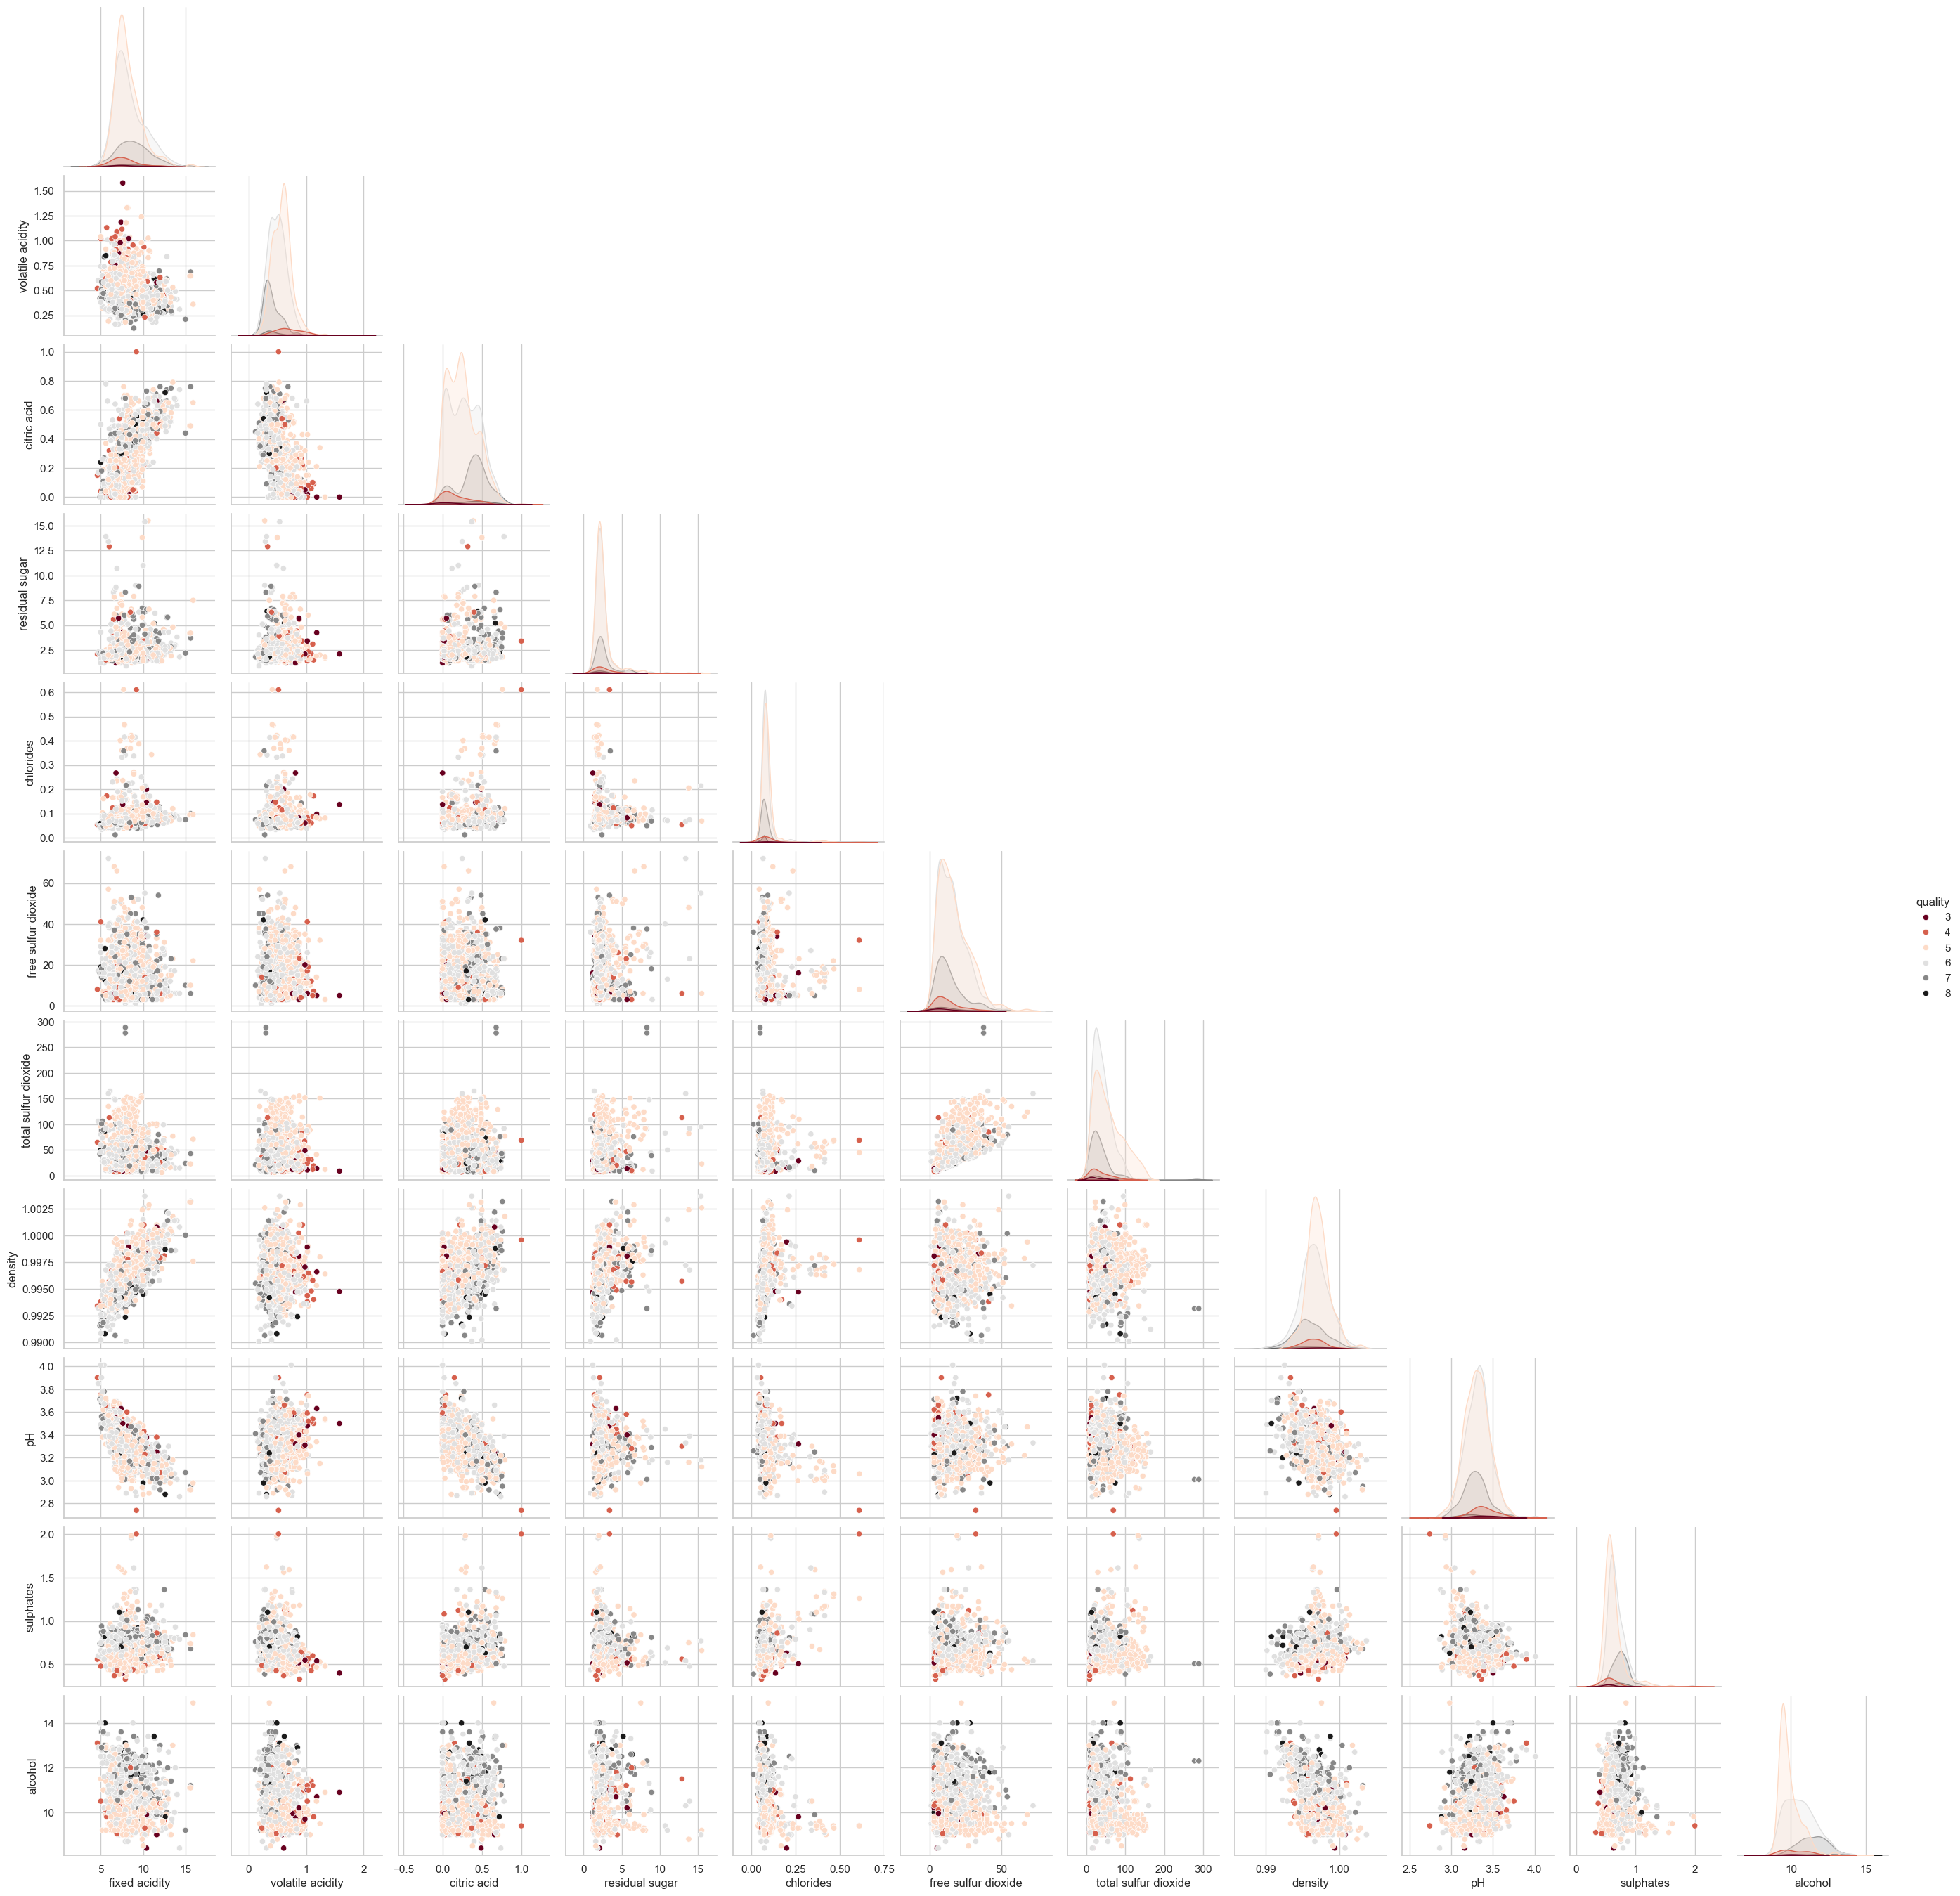

In [15]:
sns.pairplot(data=df, diag_kind='kde', hue='quality', palette='RdGy',corner=True)

plt.show()

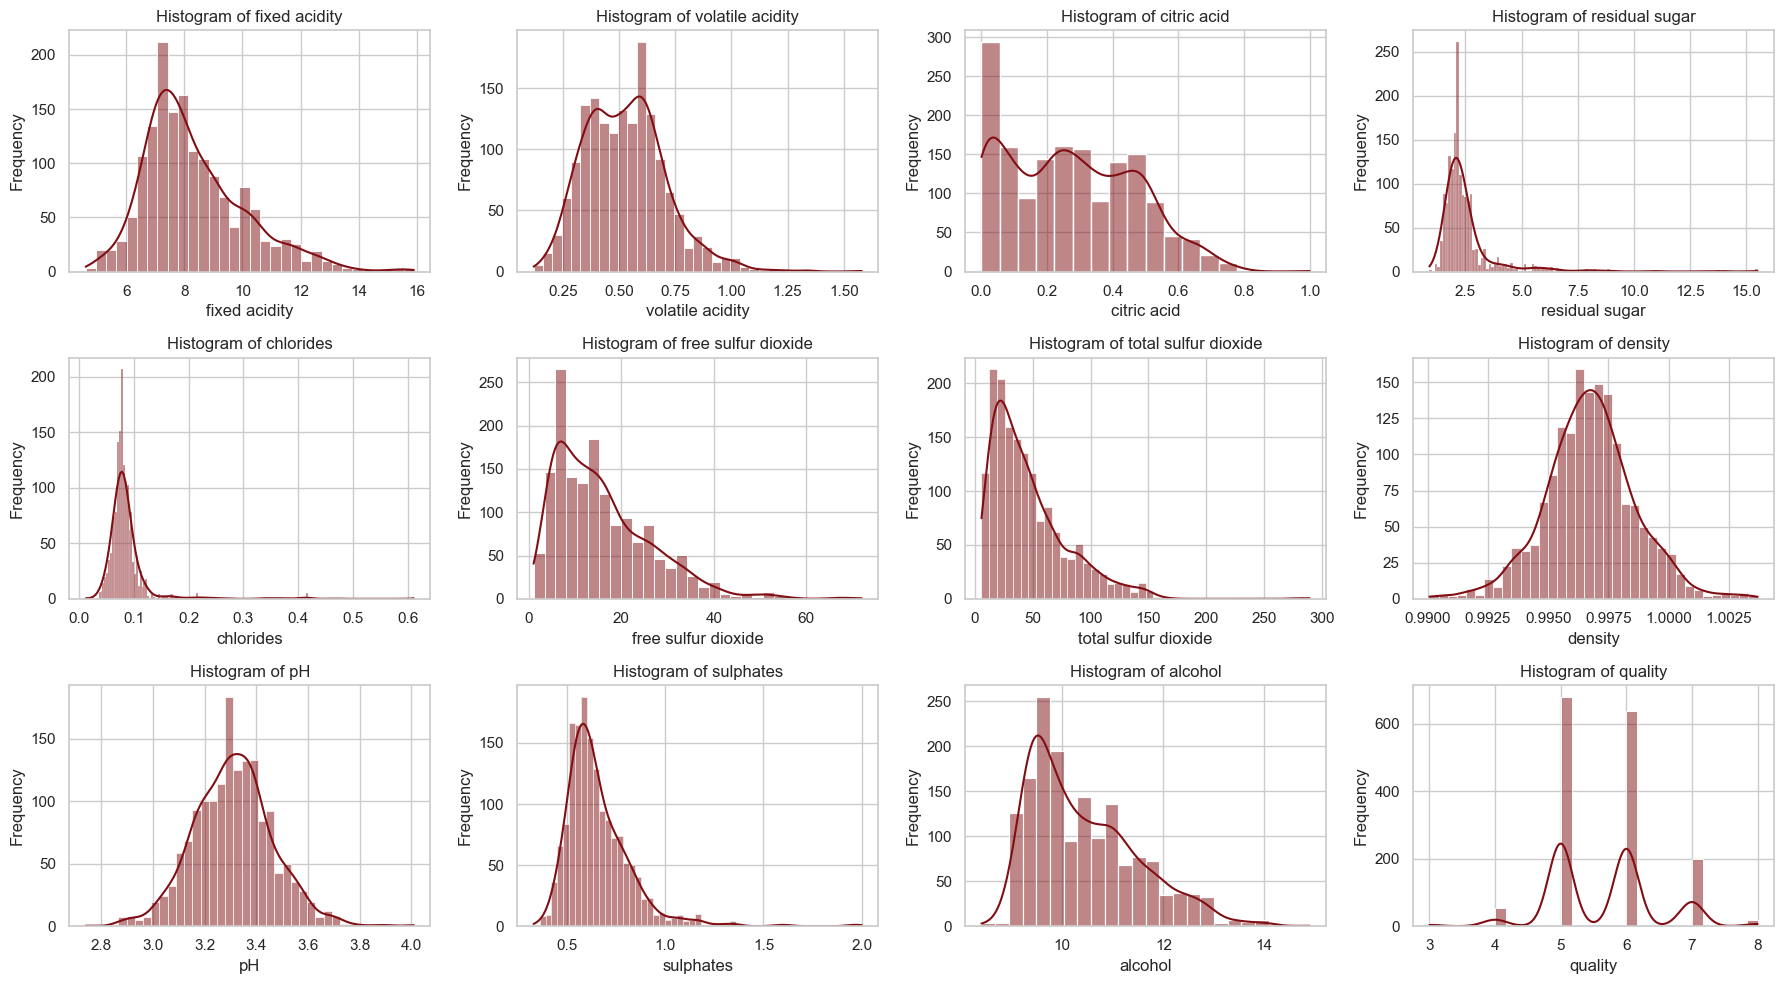

In [16]:
ff = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',

      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',

      'pH', 'sulphates', 'alcohol', 'quality']



fig, axes = plt.subplots(3, 4, figsize=(18, 10))



for i, column in enumerate(ff):

    ax = axes[i // 4, i % 4]

    sns.histplot(df[column], kde=True, color='#800E13', ax=ax, palette='RdGy')

    ax.set_title(f'Histogram of {column}')

    ax.set_xlabel(column)

    ax.set_ylabel('Frequency')

plt.tight_layout()

plt.show()

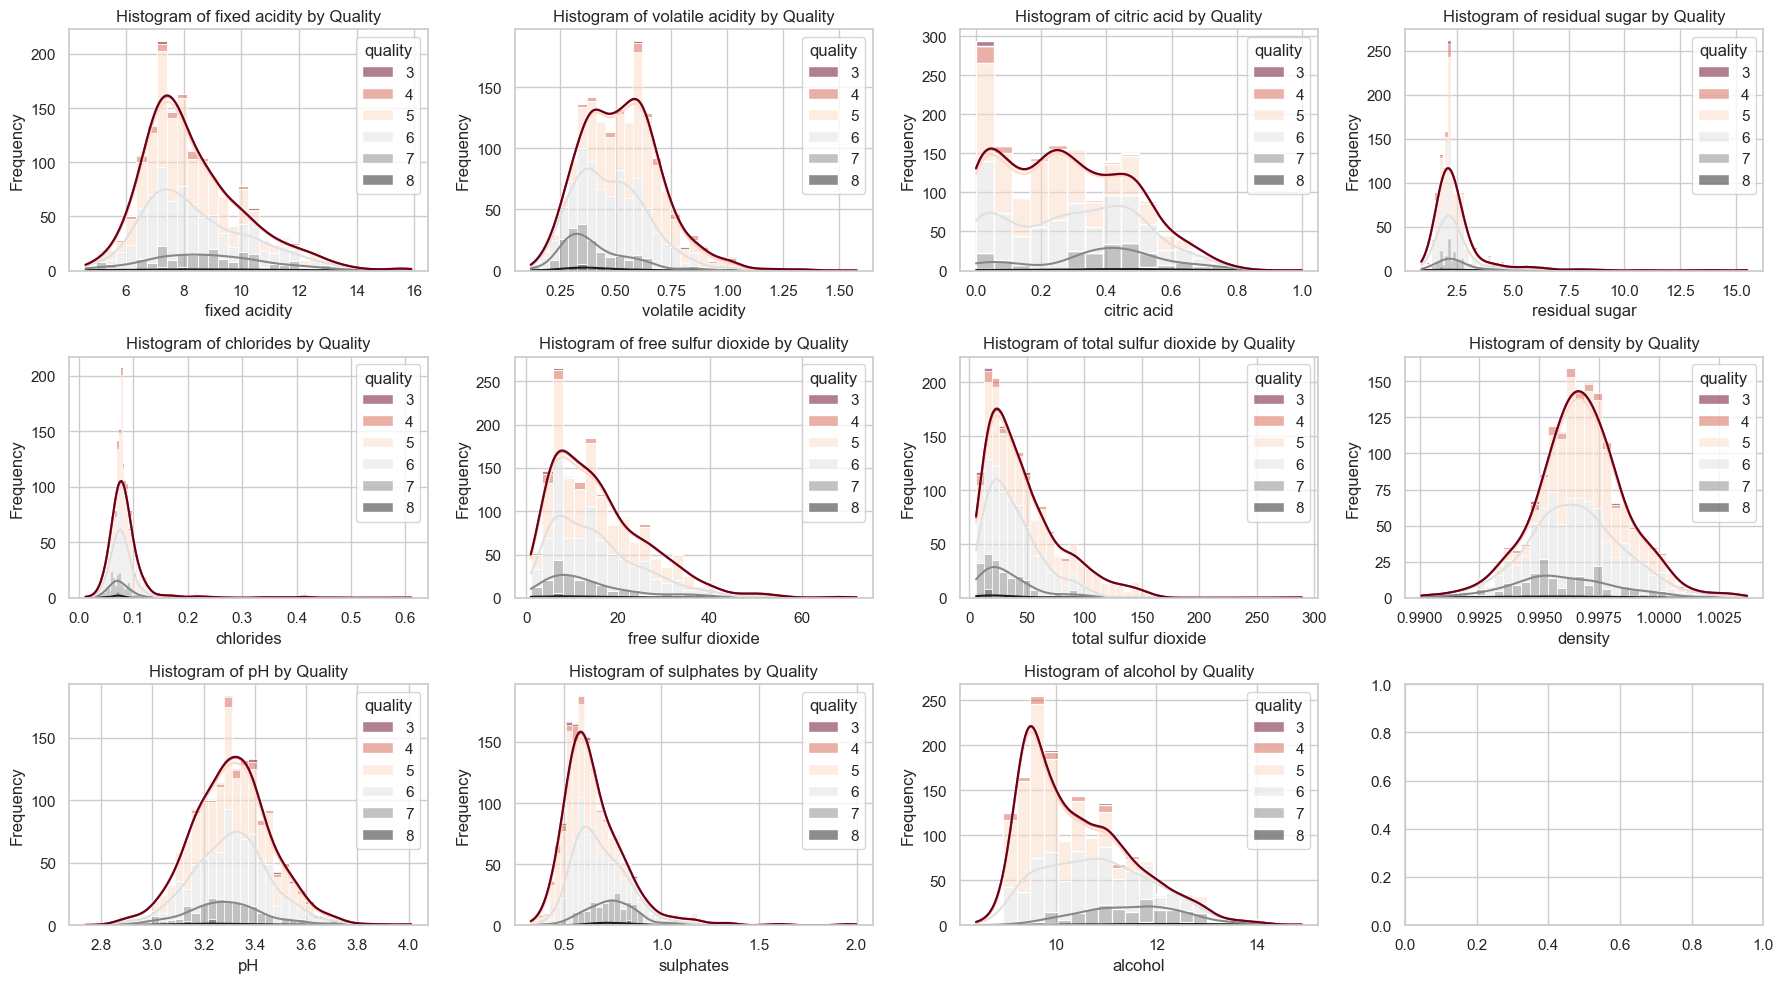

In [17]:
fig, axes = plt.subplots(3, 4, figsize=(18, 10))

for i, column in enumerate(ff[:-1]):  

    ax = axes[i // 4, i % 4]

    sns.histplot(data=df, x=column, hue='quality', kde=True, ax=ax, palette='RdGy', multiple="stack")

    ax.set_title(f'Histogram of {column} by Quality')

    ax.set_xlabel(column)

    ax.set_ylabel('Frequency')

plt.tight_layout()

plt.show()

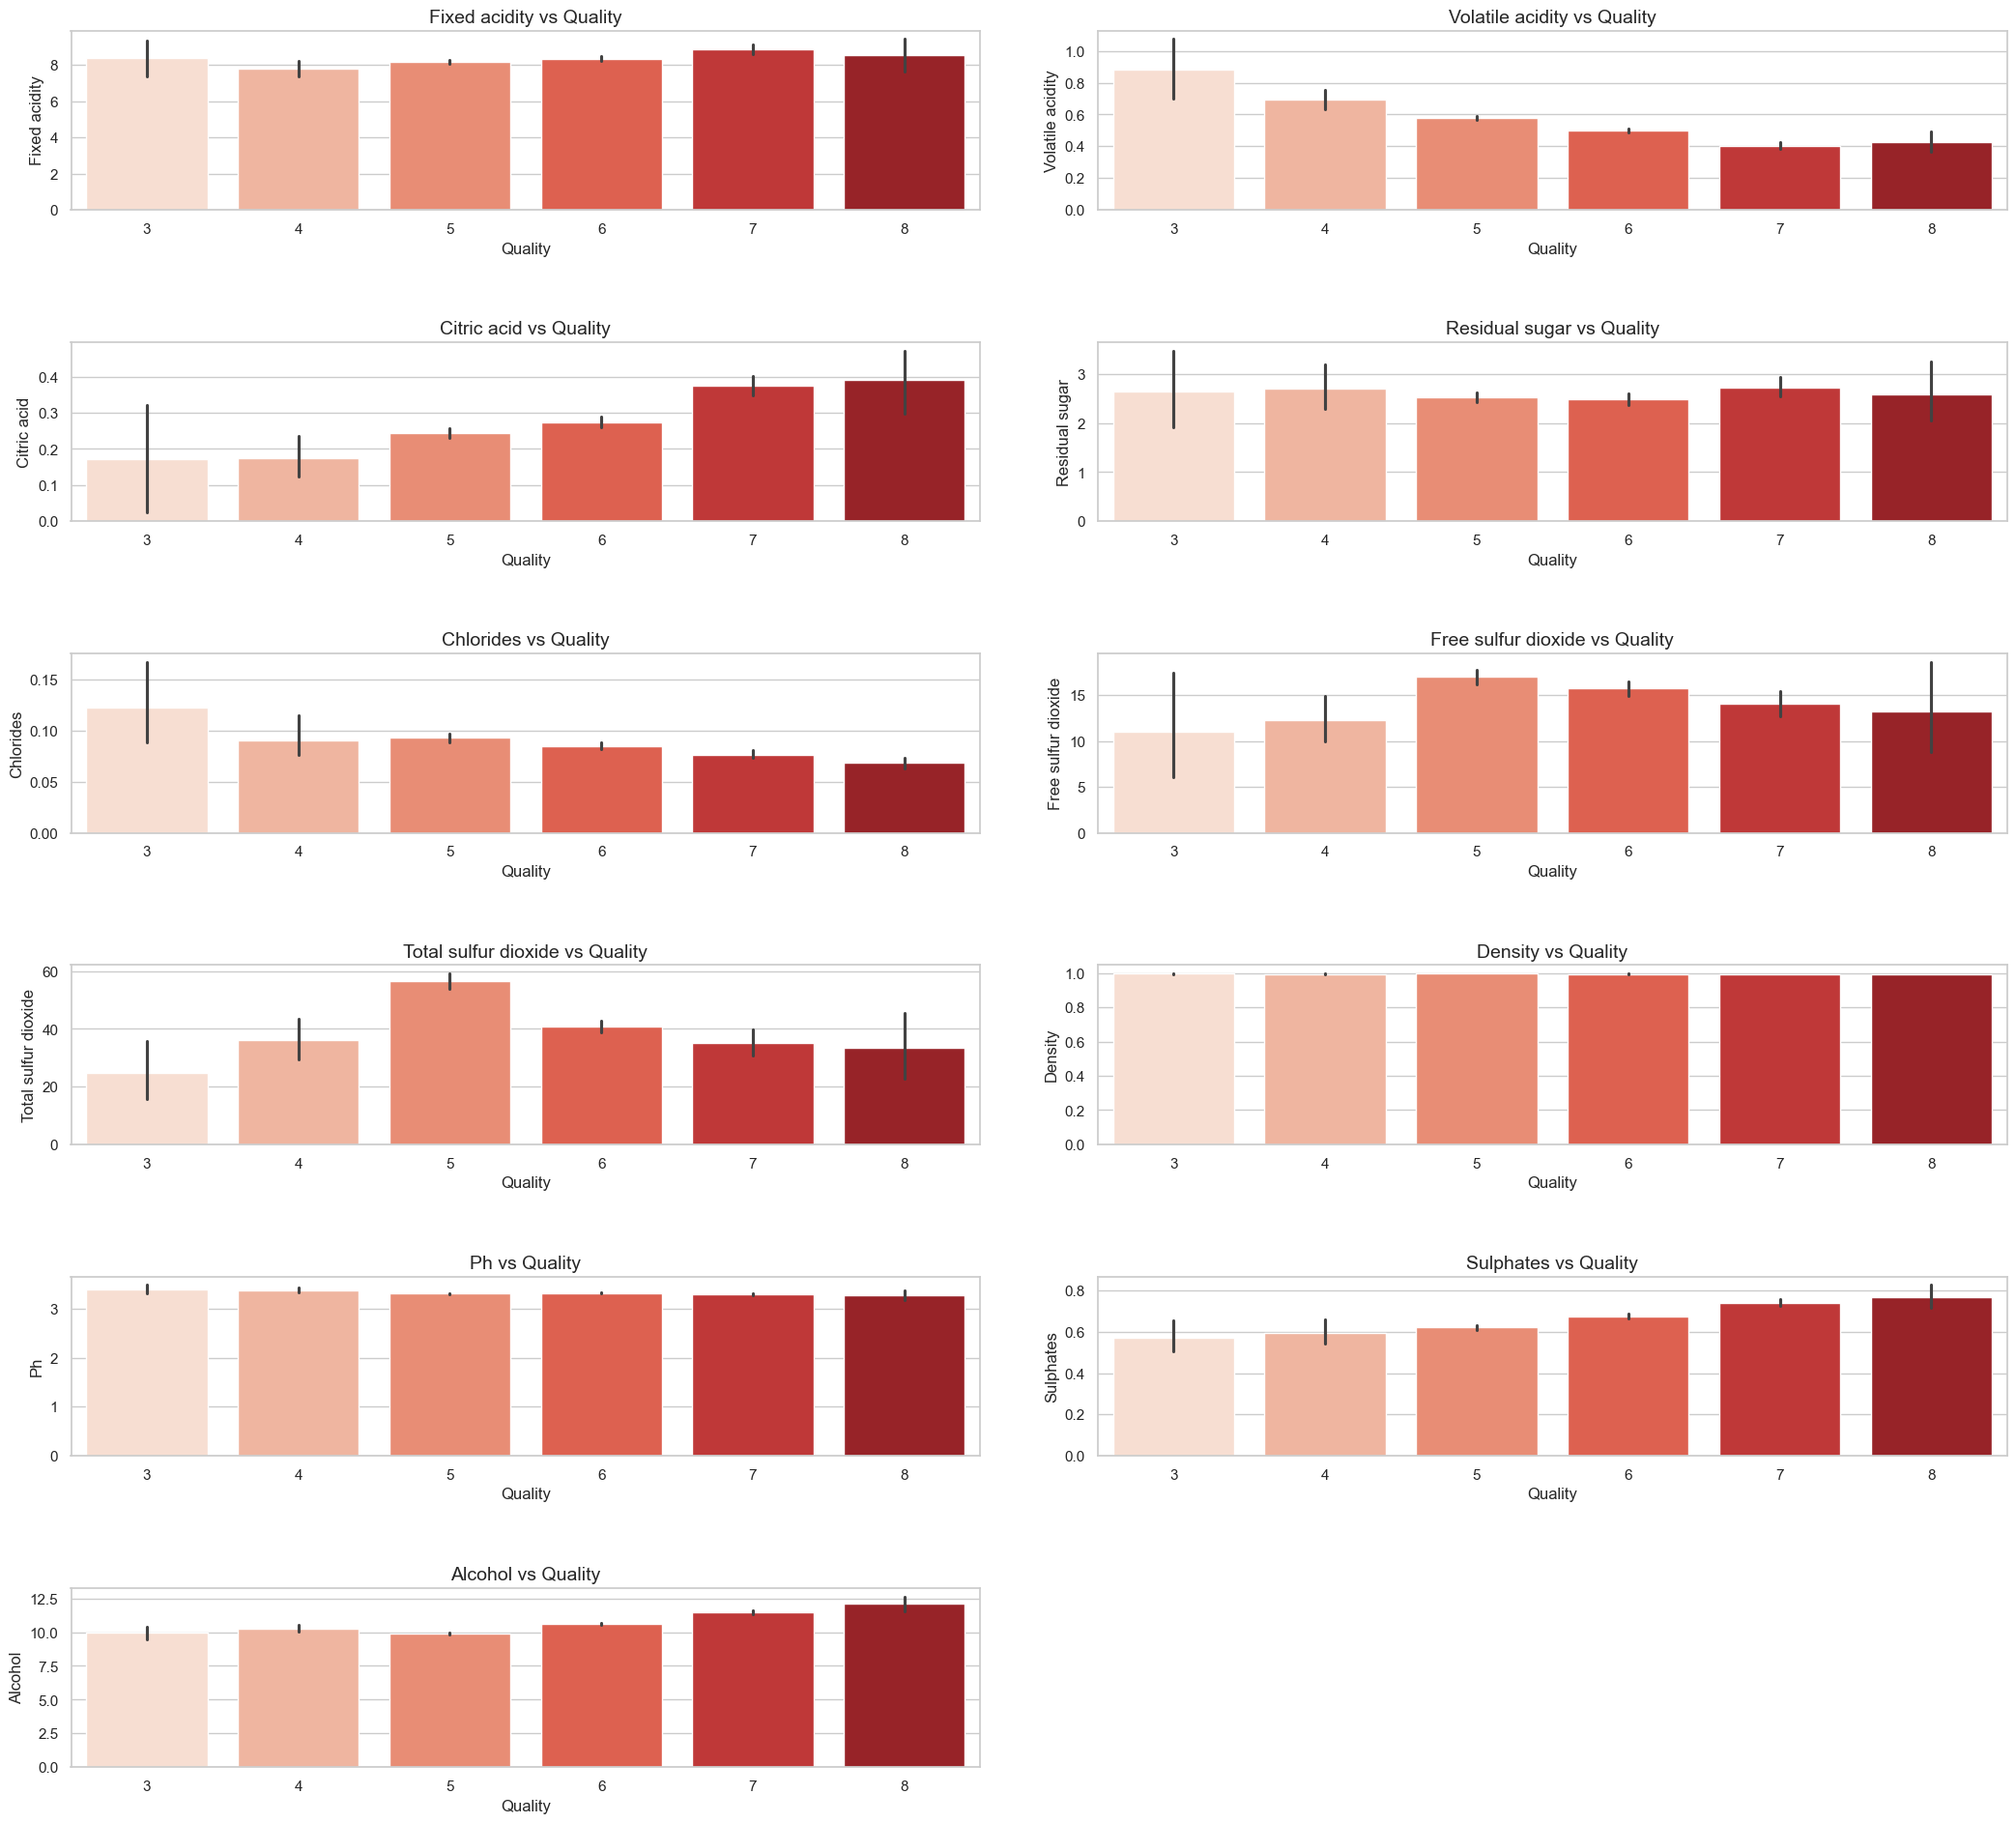

In [18]:
plt.figure(figsize=(22, 20))



columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',

           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',

           'pH', 'sulphates', 'alcohol']



for i in range(1, 12):

    plt.subplot(6, 2, i)

    sns.barplot(x='quality', y=columns[i-1], data=data, palette='Reds')

    plt.title(f'{columns[i-1].capitalize()} vs Quality', fontsize=14)

    plt.xlabel('Quality', fontsize=12)

    plt.ylabel(columns[i-1].capitalize(), fontsize=12)



plt.tight_layout(pad=4.0)

plt.show()

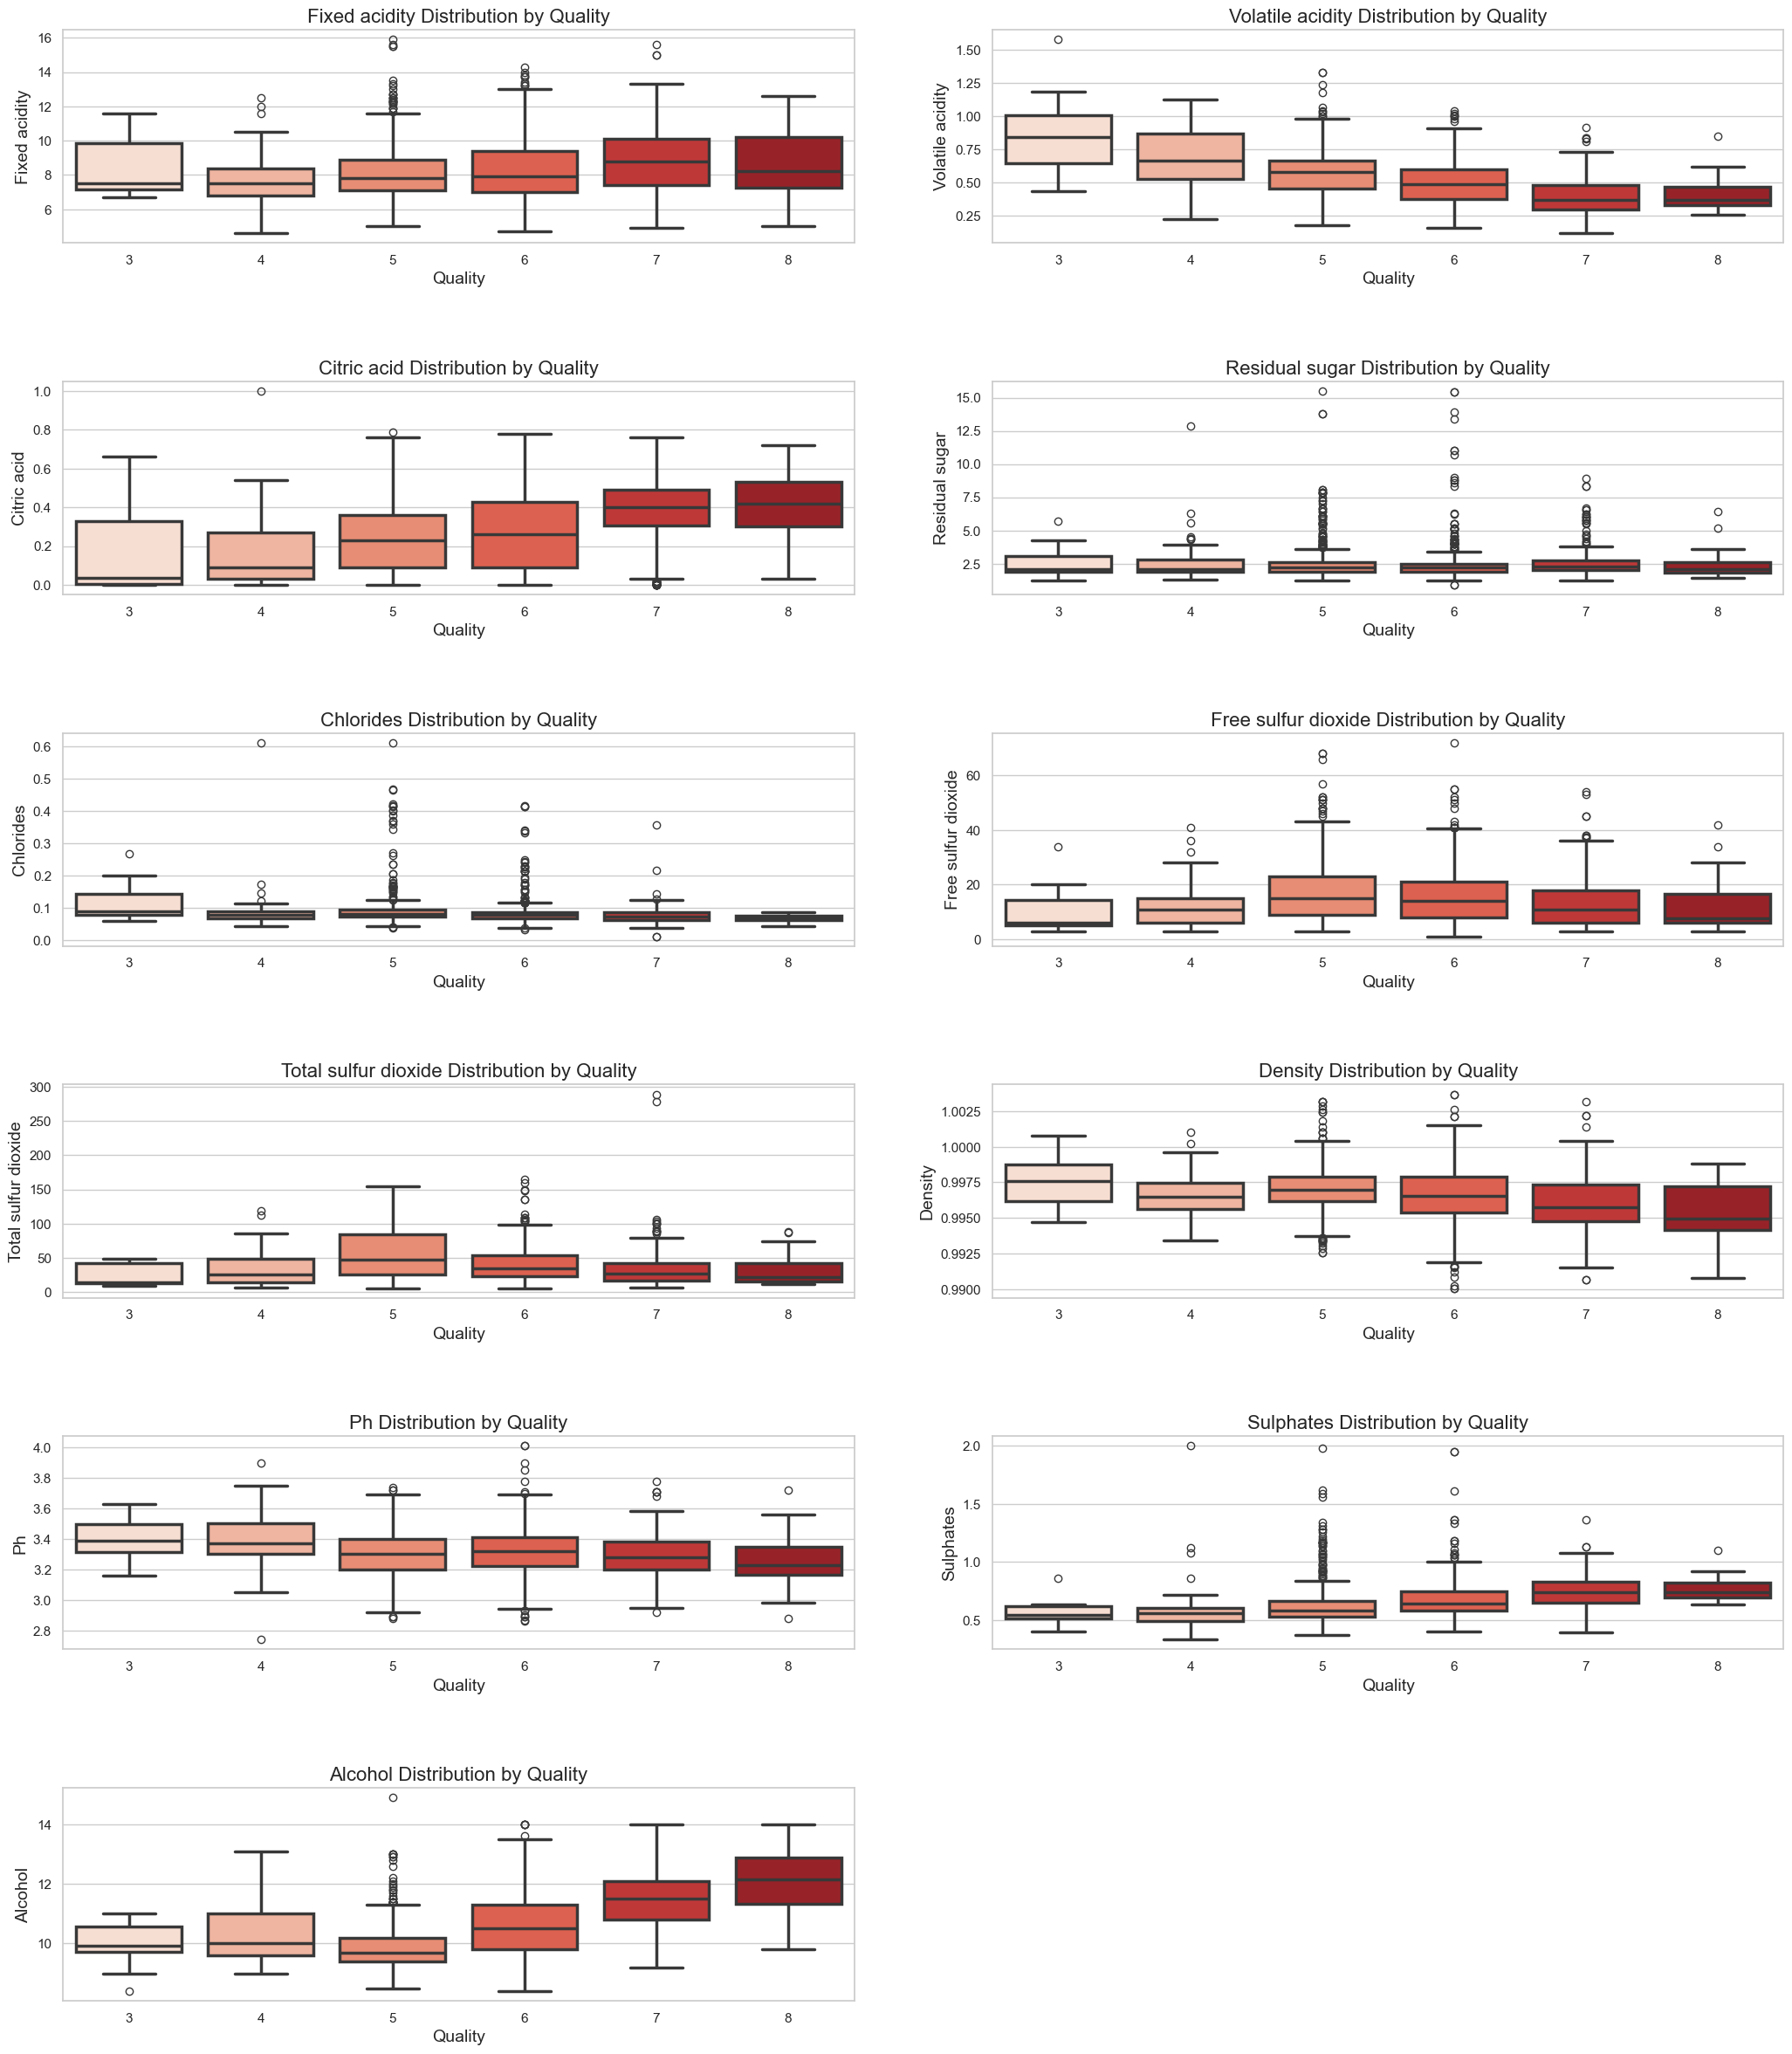

In [19]:
plt.figure(figsize=(22, 25))



columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',

           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',

           'pH', 'sulphates', 'alcohol']



for i in range(1, 12):

    plt.subplot(6, 2, i)

    sns.boxplot(x='quality', y=columns[i-1], data=data, palette='Reds', linewidth=2.5, fliersize=6)

    plt.title(f'{columns[i-1].capitalize()} Distribution by Quality', fontsize=16)

    plt.xlabel('Quality', fontsize=14)

    plt.ylabel(columns[i-1].capitalize(), fontsize=14)



plt.tight_layout(pad=5.0)

plt.show()

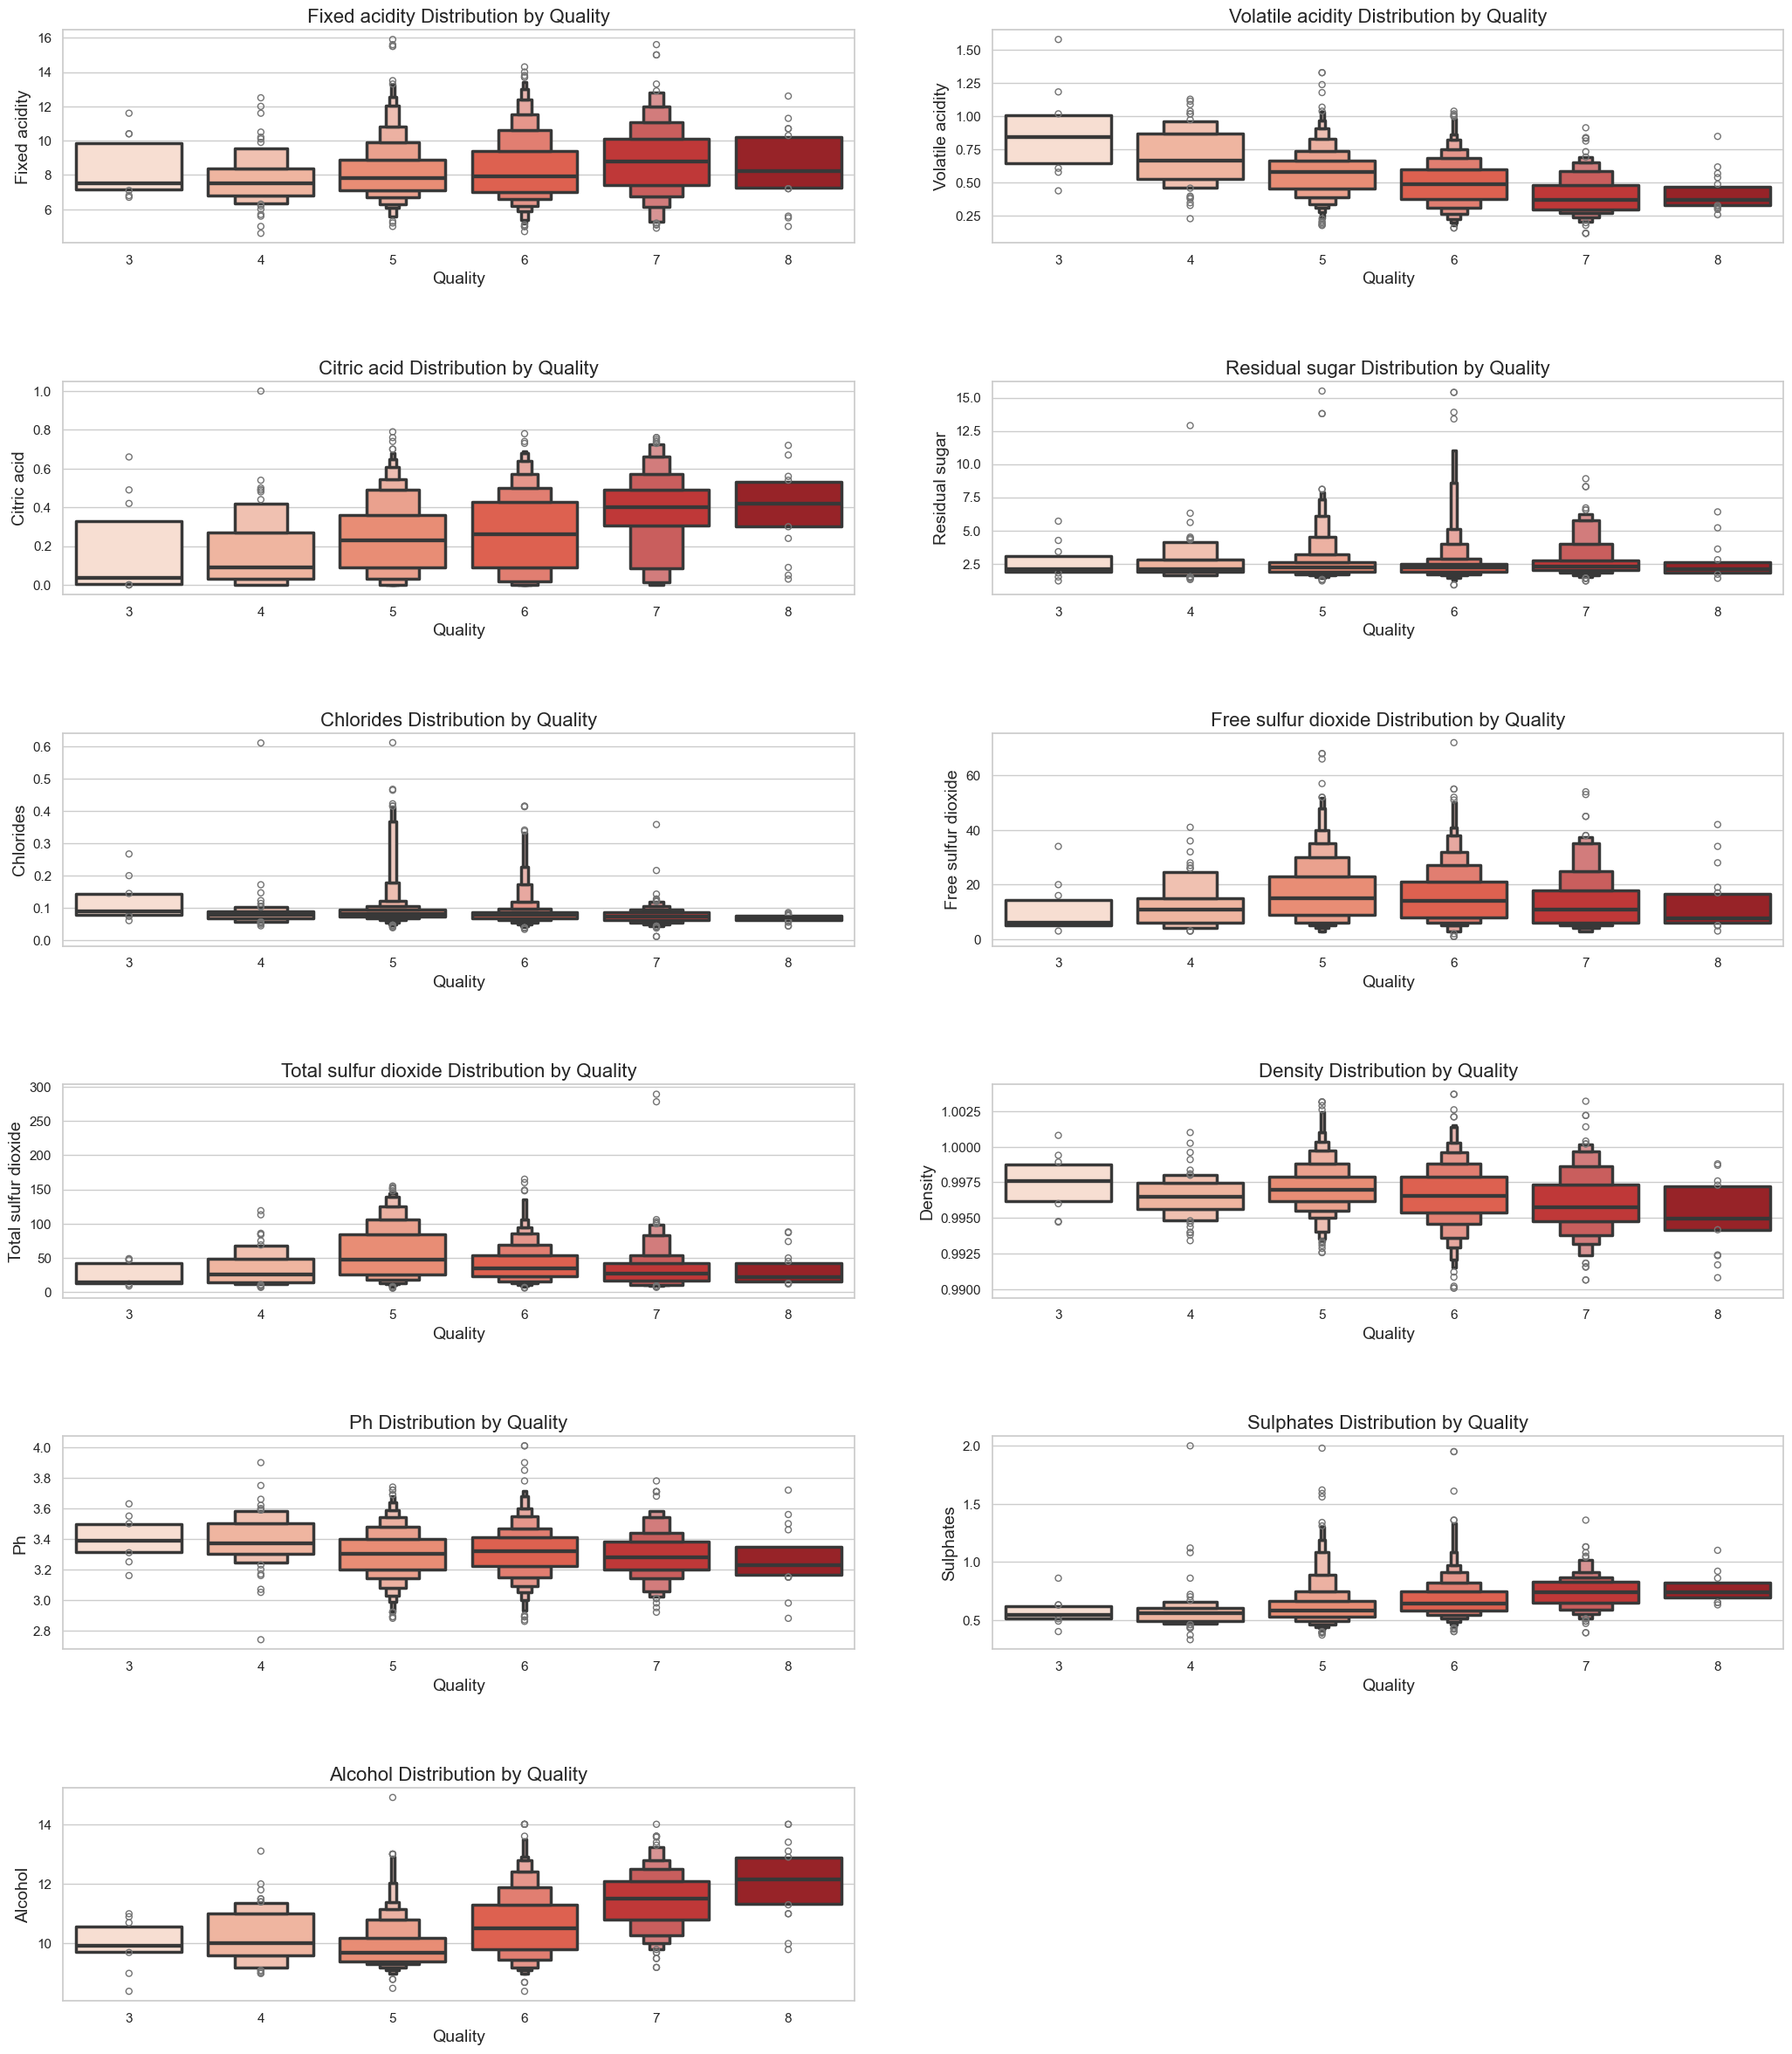

In [20]:
plt.figure(figsize=(22, 25))



columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',

           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',

           'pH', 'sulphates', 'alcohol']



for i in range(1, 12):

    plt.subplot(6, 2, i)

    sns.boxenplot(x='quality', y=columns[i-1], data=data, palette='Reds', linewidth=2.5)

    plt.title(f'{columns[i-1].capitalize()} Distribution by Quality', fontsize=16)

    plt.xlabel('Quality', fontsize=14)

    plt.ylabel(columns[i-1].capitalize(), fontsize=14)



plt.tight_layout(pad=5.0)

plt.show()

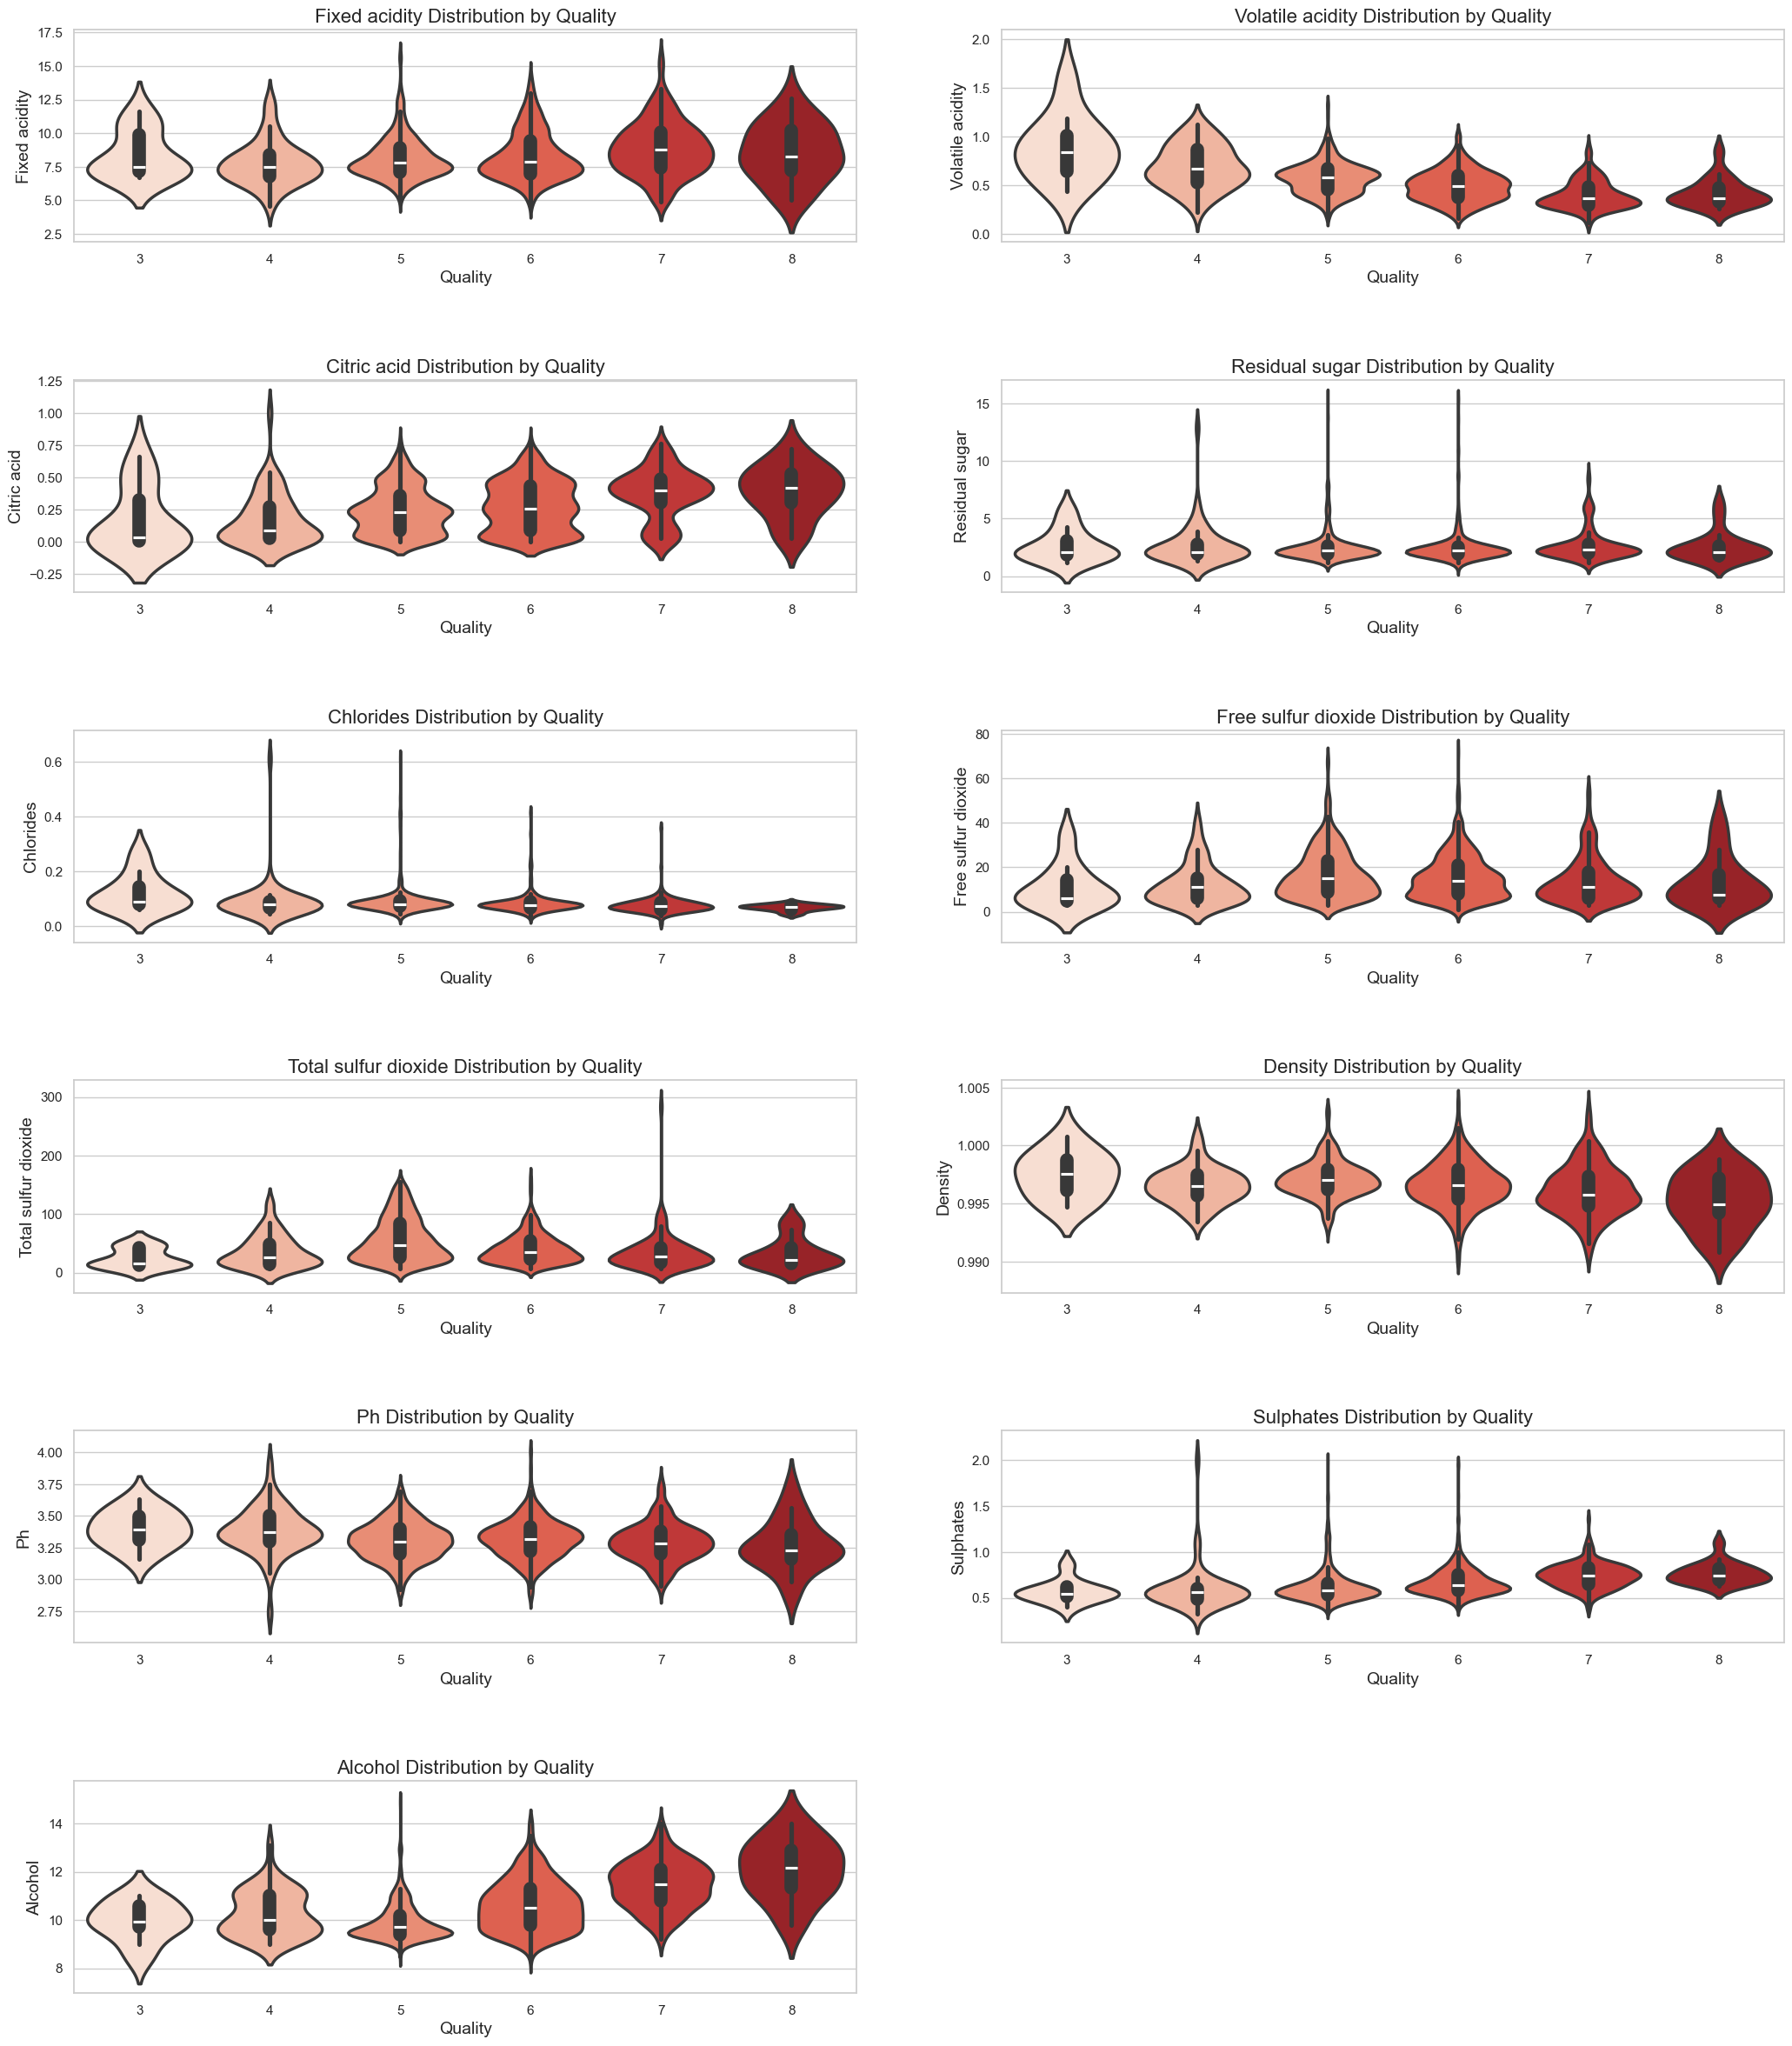

In [21]:
plt.figure(figsize=(22, 25))



columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',

           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',

           'pH', 'sulphates', 'alcohol']



for i in range(1, 12):

    plt.subplot(6, 2, i)

    sns.violinplot(x='quality', y=columns[i-1], data=data, palette='Reds', linewidth=2.5)

    plt.title(f'{columns[i-1].capitalize()} Distribution by Quality', fontsize=16)

    plt.xlabel('Quality', fontsize=14)

    plt.ylabel(columns[i-1].capitalize(), fontsize=14)



plt.tight_layout(pad=5.0)

plt.show()

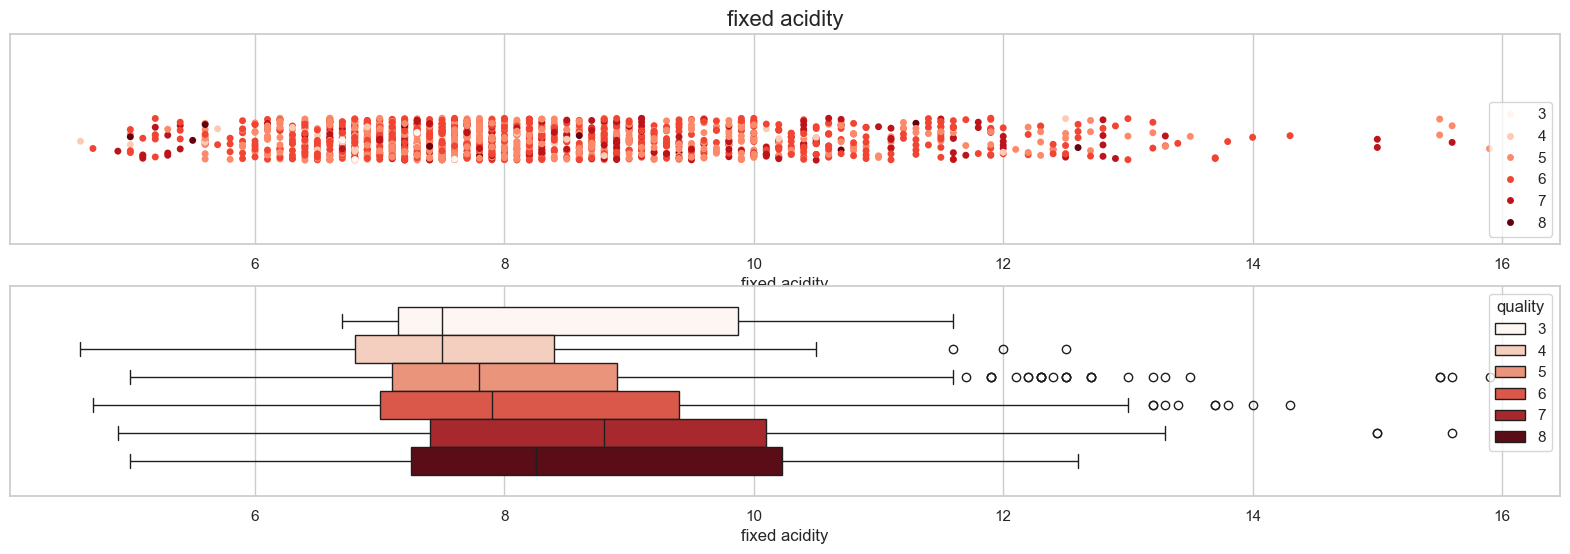

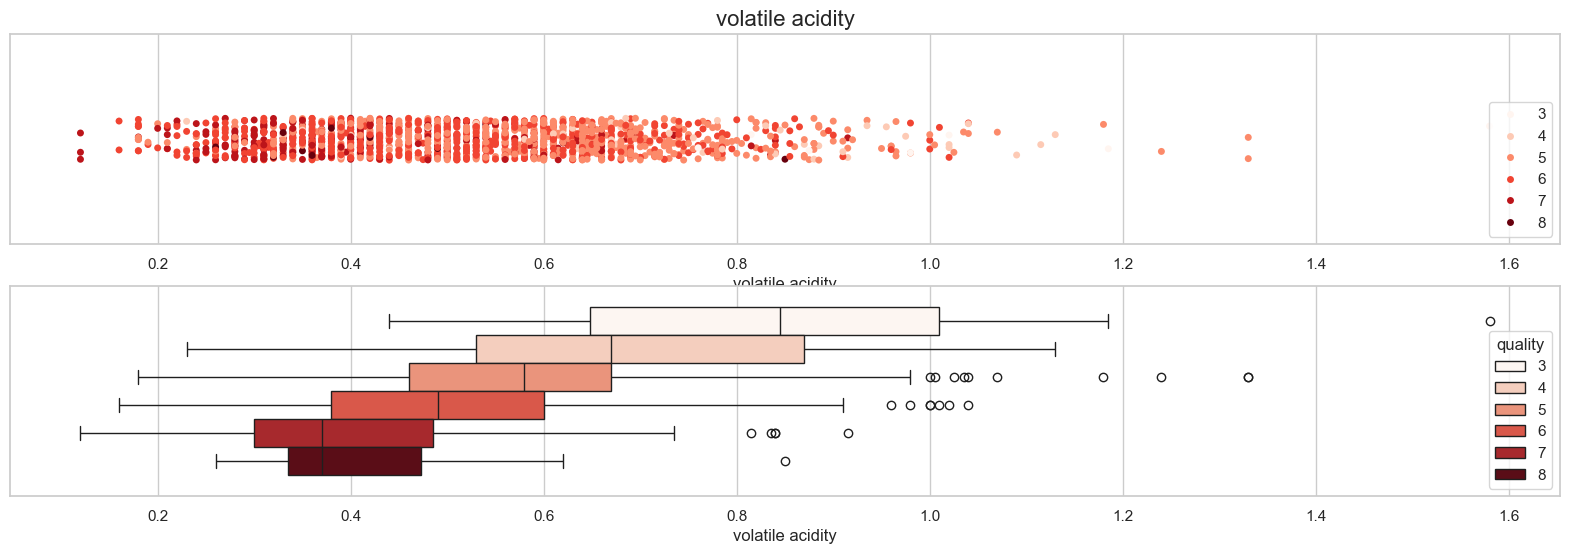

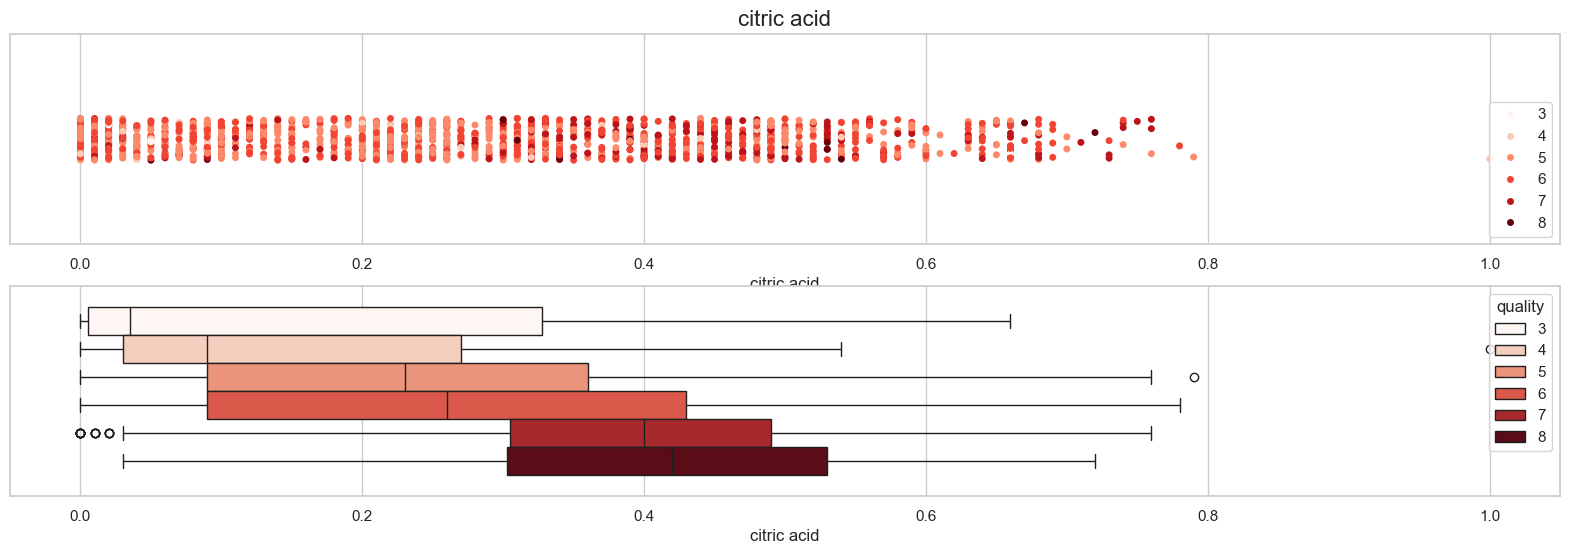

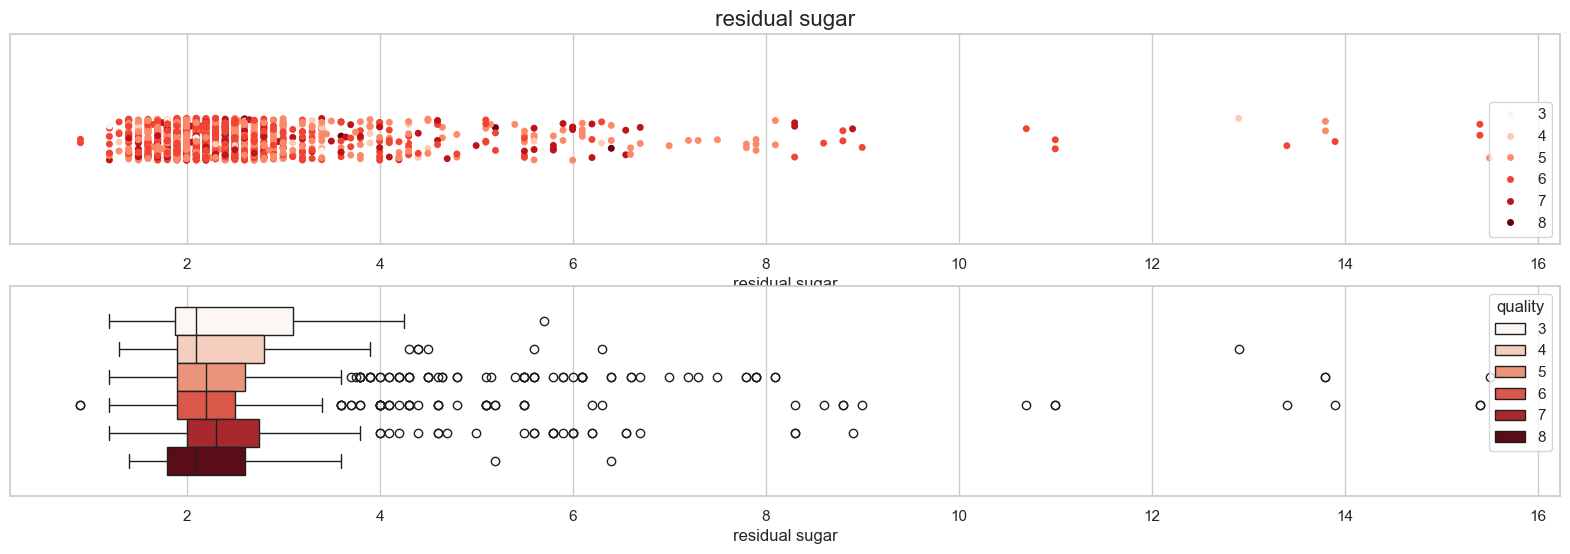

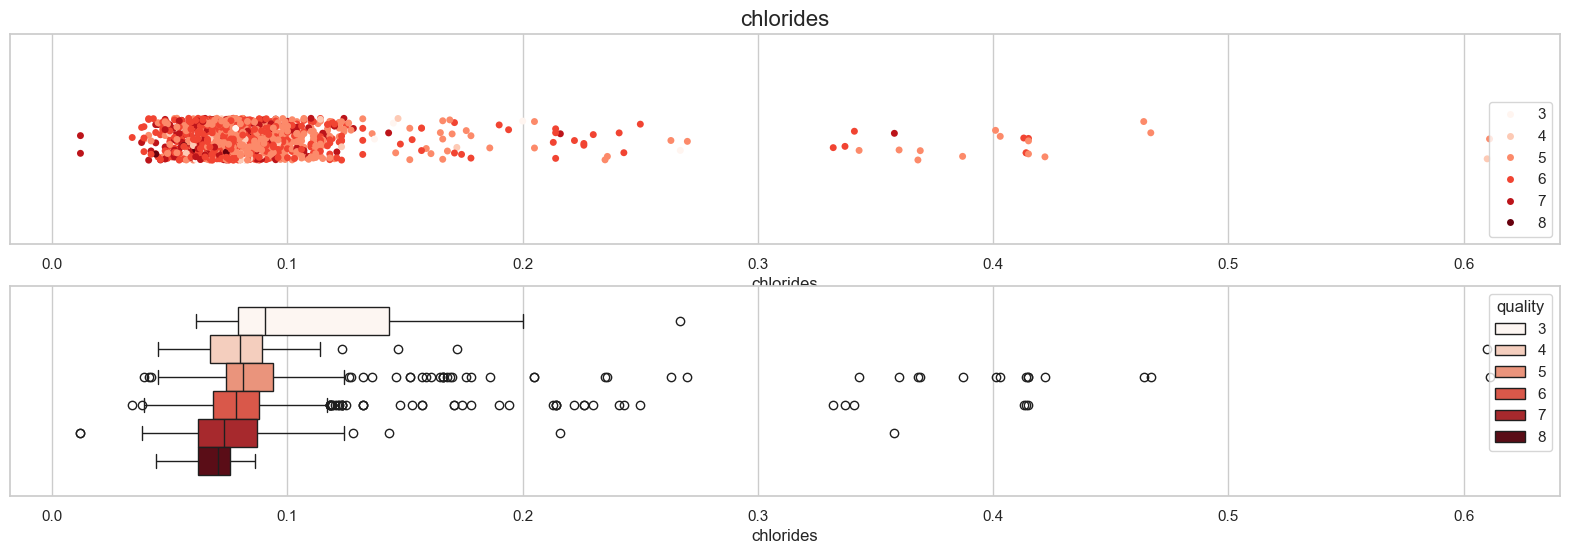

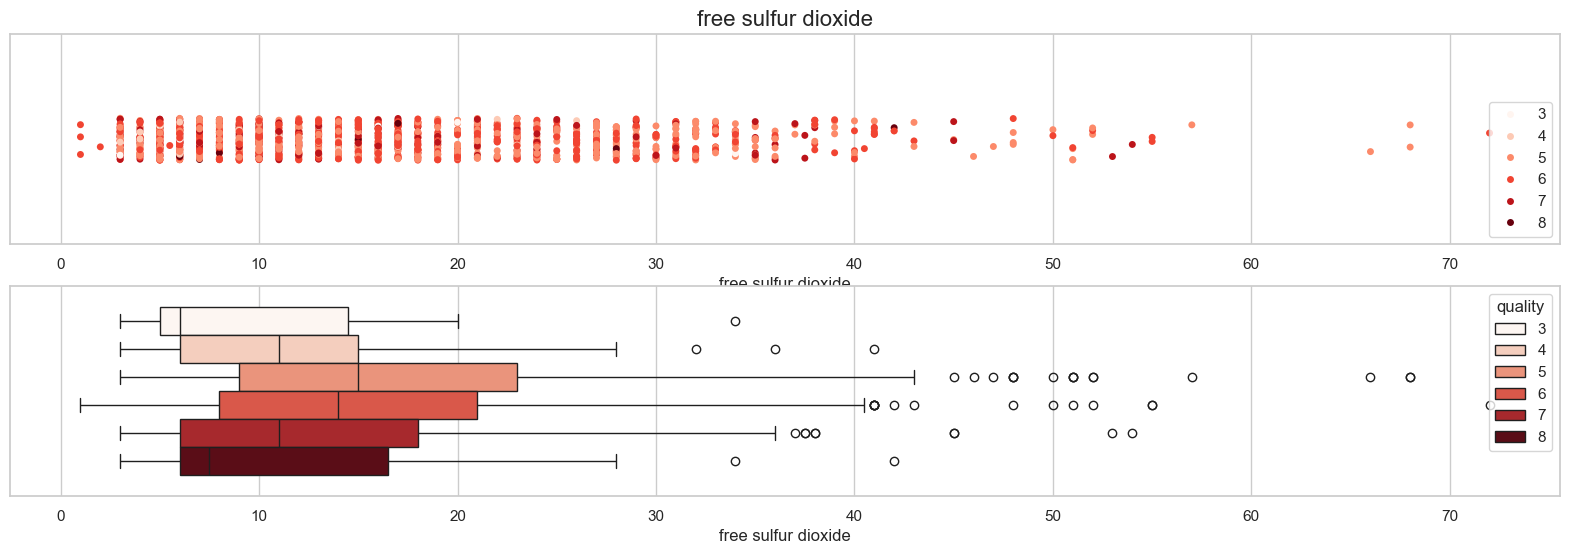

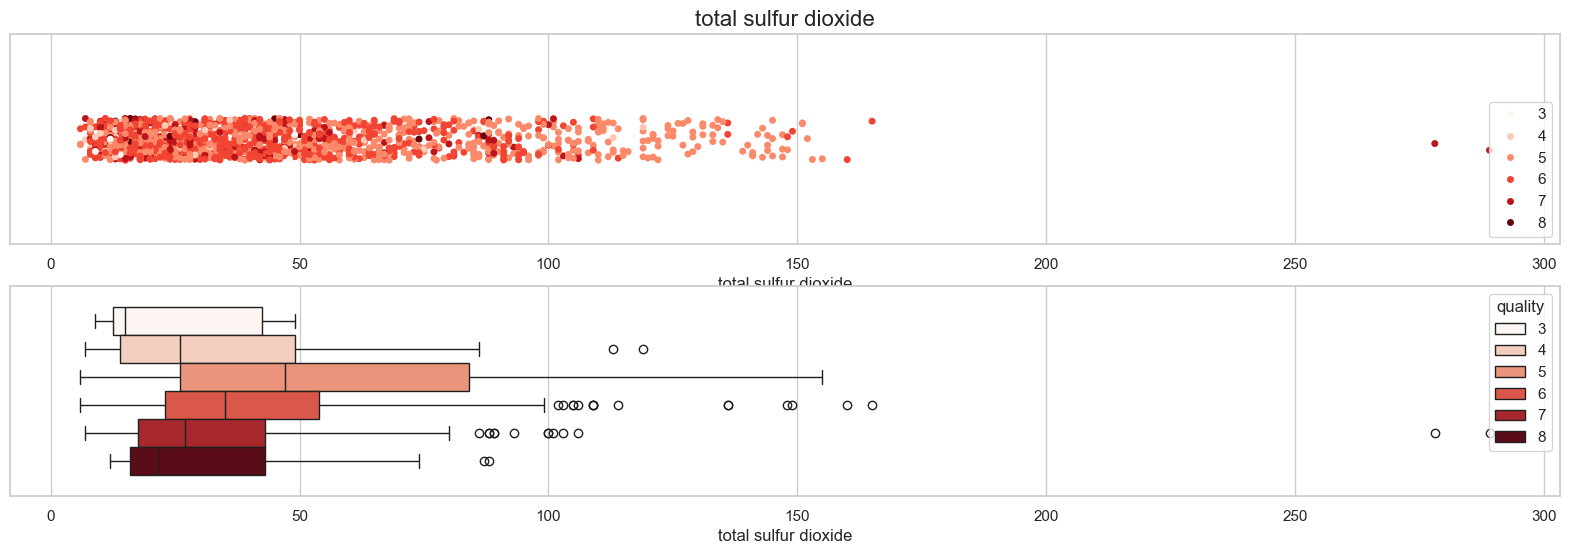

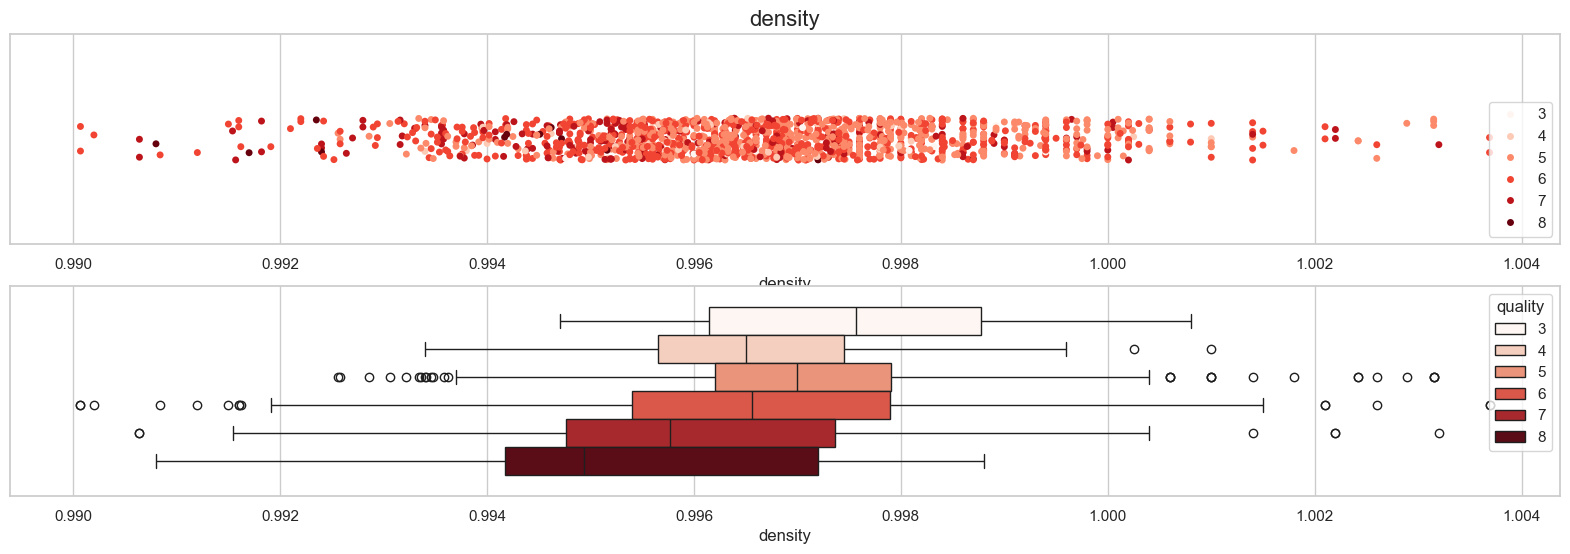

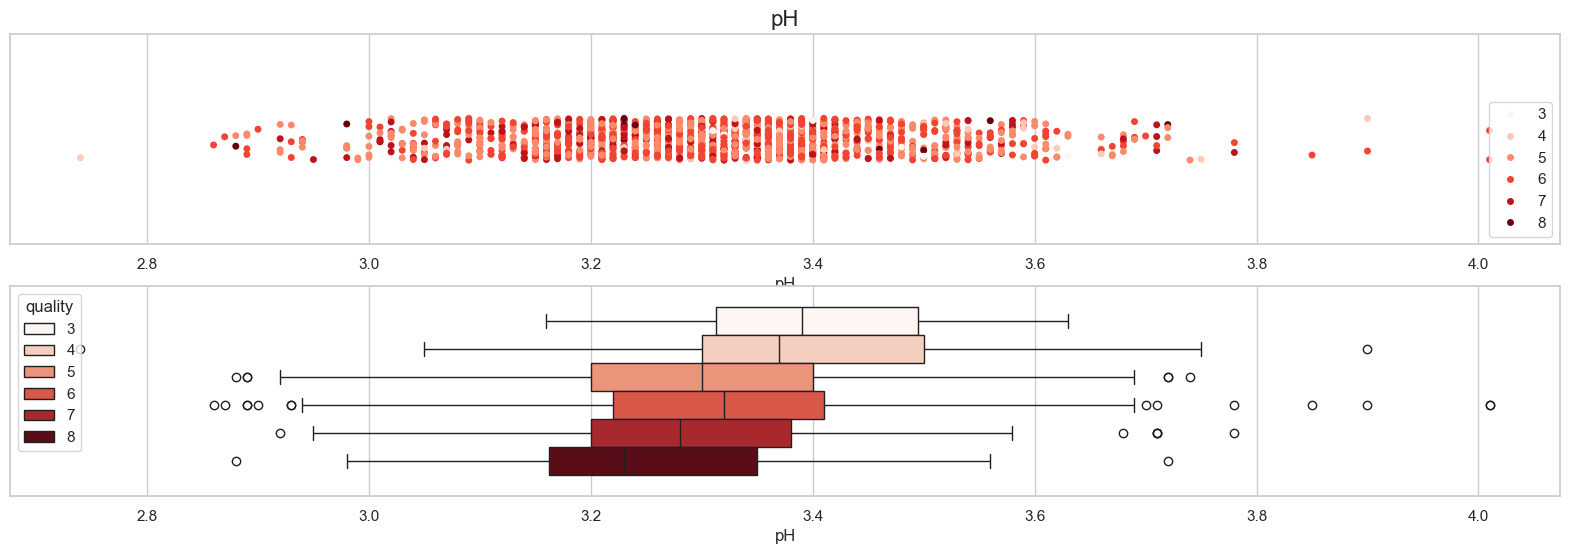

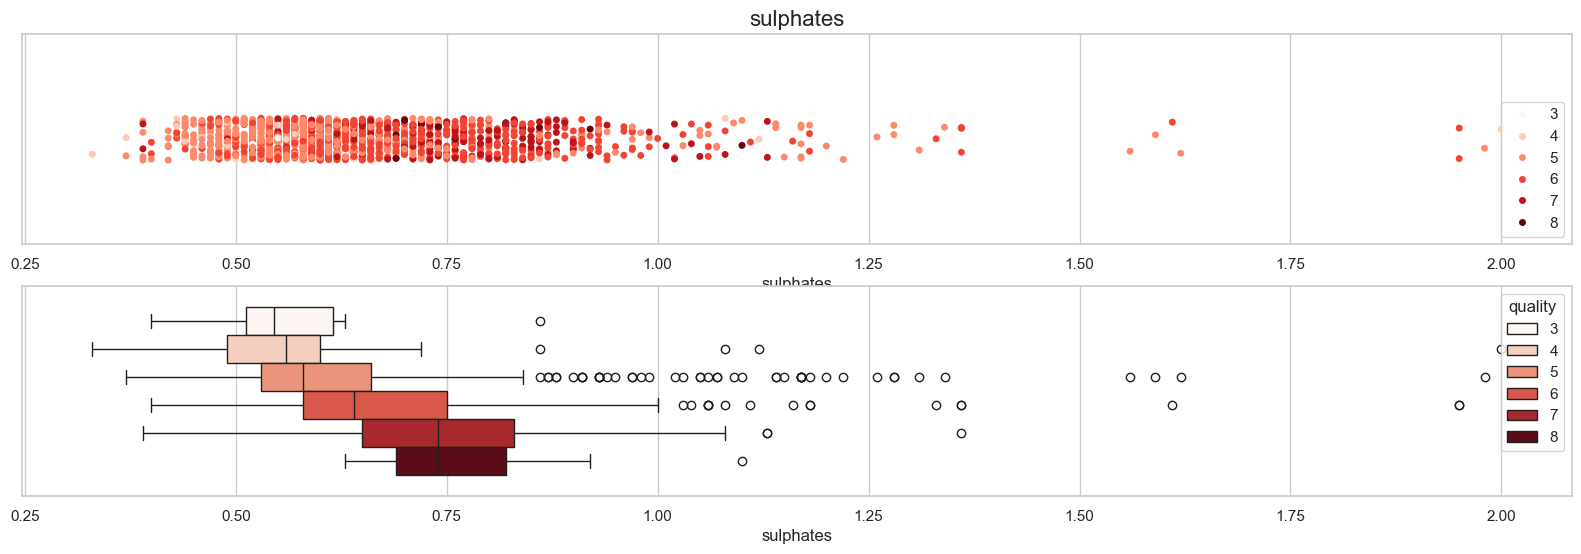

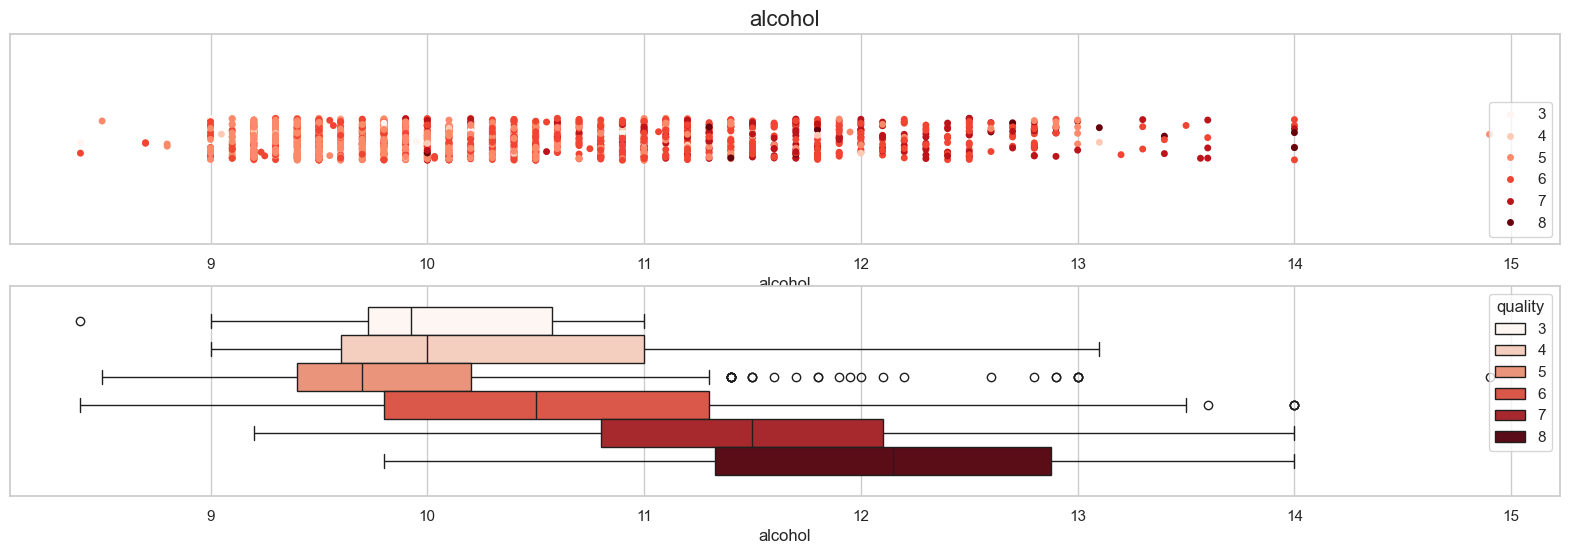

In [22]:
features = [

    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',

    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',

    'pH', 'sulphates', 'alcohol']

for feature in features:

    fig, axes = plt.subplots(2, 1, figsize=(20, 6))

    sns.stripplot(data=df, x=feature, palette='Reds', hue='quality', orient='h', ax=axes[0])

    axes[0].set_title(feature, fontsize=16)

    axes[0].legend(loc=4)

    sns.boxplot(data=df, x=feature, palette='Reds', hue='quality', orient='h', ax=axes[1])

    plt.show()

In [23]:
data = data.replace({'quality' : {

                                    8 : 'Good',

                                    7 : 'Good',

                                    6 : 'Middle',

                                    5 : 'Middle',

                                    4 : 'Bad',

                                    3 : 'Bad',}})

In [24]:
data['quality'].value_counts()

quality
Middle    1319
Good       217
Bad         63
Name: count, dtype: int64

In [25]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4  Middle  
1      9.8  Middle  
2      9.8  Middle  
3      9.8  Middle  
4      9.4  Middle

In [26]:
labelencoder_y = LabelEncoder()

data['quality'] = labelencoder_y.fit_transform(data['quality'])

In [27]:
train_columns = data.columns[:-1]

train_columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

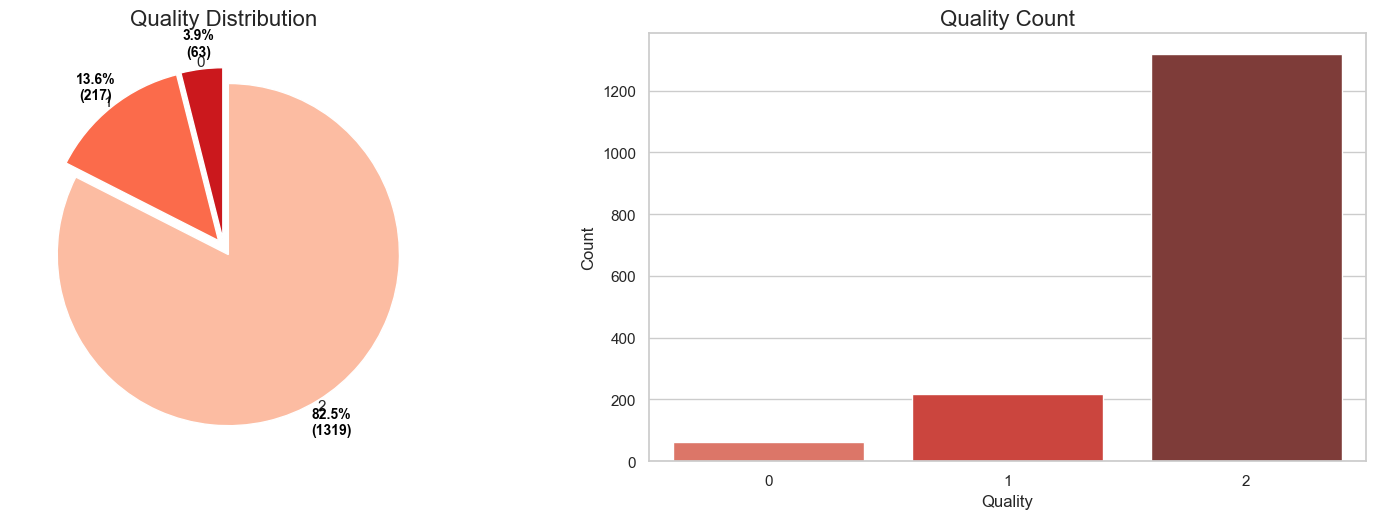

In [28]:
# Function to place labels outside the pie chart

def autopct_outside(pct, values):

    total = sum(values)

    val = int(round(pct * total / 100.0))

    return f'{pct:.1f}%\n({val})'



plt.figure(figsize=(16, 6))



# First plot - Pie chart

plt.subplot(1, 2, 1)

quality_counts = data['quality'].value_counts().sort_index()

explode = [0.05] * len(quality_counts)  # Slight separation for all slices

wedges, texts, autotexts = plt.pie(

    quality_counts,

    labels=quality_counts.index,

    colors=sns.color_palette('Reds_r', len(quality_counts)),

    autopct=lambda pct: autopct_outside(pct, quality_counts),

    startangle=90,

    explode=explode,

    pctdistance=1.15,  # Adjusts position of the percentage labels

    labeldistance=1.04  # Adjusts position of the labels

)



# Adjust label positions

for text in texts:

    text.set_horizontalalignment('center')

for autotext in autotexts:

    autotext.set_color('black')

    autotext.set_fontsize(10)

    autotext.set_weight('bold')



plt.title('Quality Distribution', fontsize=16)



# Second plot - Count plot

plt.subplot(1, 2, 2)

sns.countplot(

    data=data,

    x='quality',

    palette='Reds_d',

)

plt.title('Quality Count', fontsize=16)

plt.xlabel('Quality', fontsize=12)

plt.ylabel('Count', fontsize=12)



# General layout improvements

plt.tight_layout(pad=3.0)

plt.show()

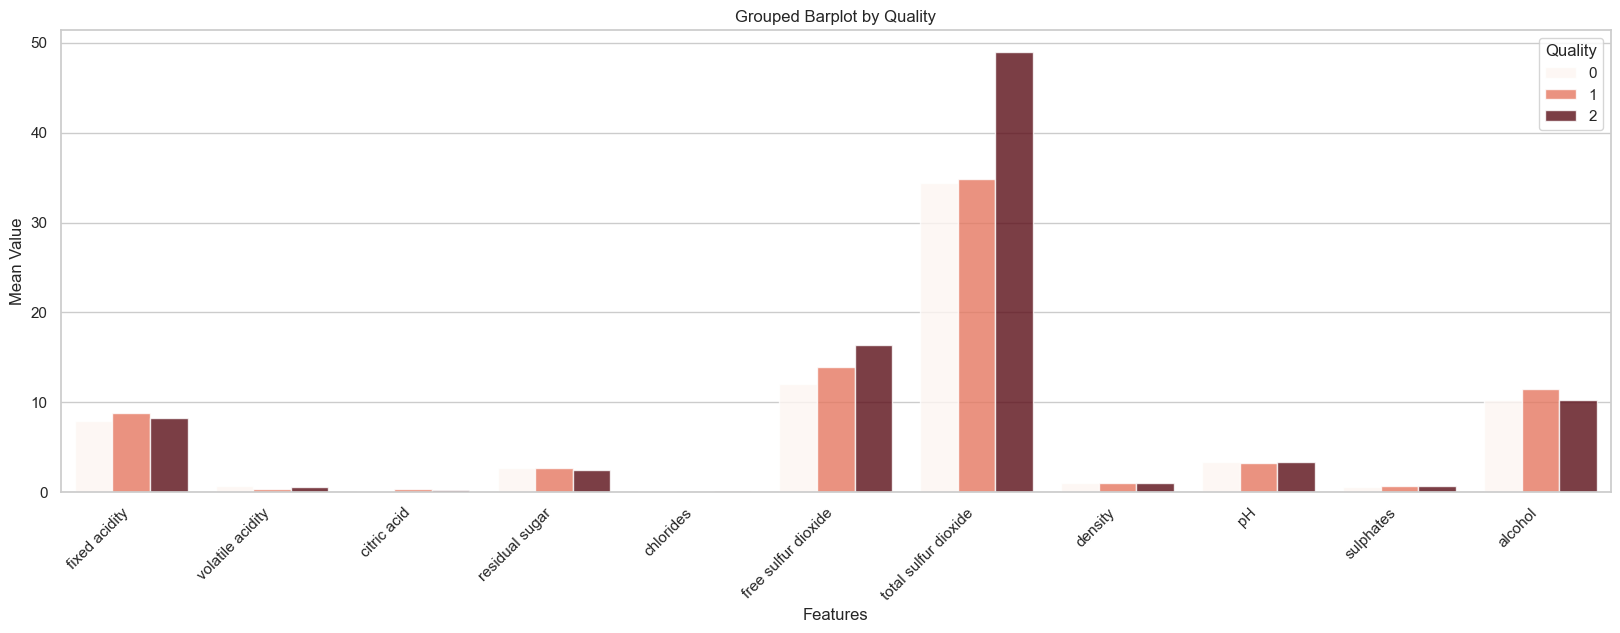

In [29]:
gm = data.groupby('quality').mean()

plt.figure(figsize=(20, 6))

sns.barplot(data=gm.reset_index().melt(id_vars='quality'),

            x='variable', y='value', hue='quality', palette='Reds', alpha=0.8)

plt.xlabel('Features')

plt.ylabel('Mean Value')

plt.title('Grouped Barplot by Quality')

plt.xticks(rotation=45, ha='right')

plt.legend(title='Quality')

plt.show()

In [30]:
X = data.drop('quality', axis = 1).values

y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

print("Shape of X_train: ",X_train.shape)

print("Shape of X_test: ", X_test.shape)

print("Shape of y_train: ",y_train.shape)

print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279,)
Shape of y_test (320,)


In [31]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

y_train = y_train.ravel()

y_test = y_test.ravel()

In [32]:
# Initialize lists to store algorithm names, accuracies, and model details

al = []

accuracy = []

models = []



# Function to evaluate the performance of a model

def evaluate_model(algorithm_name, model): 

    # Train the model and make predictions

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    y_pred_prob = model.predict_proba(X_test)

    

    # Calculate accuracy scores

    acc_model = model.score(X_test, y_test)

    train_acc_model = model.score(X_train, y_train)

    

    # Store the algorithm name and accuracy

    al.append(algorithm_name)

    accuracy.append(acc_model)

    

    # Print performance metrics

    print('\033[31m' + f'For {algorithm_name}' + '\033[0m\n')  # Red color for algorithm name

    print(f'Training Accuracy: {train_acc_model * 100:.4f} %\n')

    print(f'Testing Accuracy: {acc_model * 100:.4f} %\n')

    print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.4f} %\n')

    

    # Create subplots for the confusion matrix and ROC curve

    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    plt.subplot(1, 2, 1)

    fig.suptitle(f'Graphs for {algorithm_name}', fontsize=25)



    # Plot the confusion matrix

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 

                cmap='RdGy', annot_kws={'size': 15}, 

                square=True, fmt='.0f',

                ax=axes[0])

    axes[0].set_title('Confusion Matrix', fontsize=20)

    

    # Plot the ROC curve for multiclass using one-vs-rest strategy

    plt.subplot(1, 2, 2)

    lb = LabelBinarizer()

    y_test_bin = lb.fit_transform(y_test)  # Binarize the test labels for multiclass ROC

    

    for i in range(y_test_bin.shape[1]):  # loop through each class

        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])

        roc = auc(fpr, tpr)

        axes[1].plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc:.2f})', color='red')

    

    axes[1].set_xlabel('False Positive Rate', fontsize=15)

    axes[1].set_ylabel('True Positive Rate', fontsize=15)

    axes[1].set_title(f'ROC Curves for Multiclass', fontsize=20)

    axes[1].legend()

    

    plt.tight_layout()

    plt.show()



    # Plot permutation importance for feature evaluation

    if algorithm_name != 'K Nearest Neighbors':

        # Calculate permutation importance

        perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)



        # Extract and plot feature importances

        feature_importance = perm_importance.importances_mean

        feature_names = train_columns



        plt.figure(figsize=(12, 6))

        plt.barh(feature_names, feature_importance, color='#b40000')  # Red color for bars

        plt.xlabel('Permutation Importance')

        plt.ylabel('Feature')

        plt.title('Permutation Importance for Features')

        plt.show()

    

    # Extract confusion matrix values (True Positive, False Positive, etc.)

    tp = confusion_matrix(y_test, y_pred)[0, 0]

    fp = confusion_matrix(y_test, y_pred)[0, 1]

    tn = confusion_matrix(y_test, y_pred)[1, 1]

    fn = confusion_matrix(y_test, y_pred)[1, 0]



    # Append the model evaluation results to the models list

    models.append((algorithm_name, tp, fp, tn, fn, train_acc_model, acc_model))

For Logistic Regression

Training Accuracy: 84.5192 %

Testing Accuracy: 85.0000 %

Accuracy Score: 85.0000 %



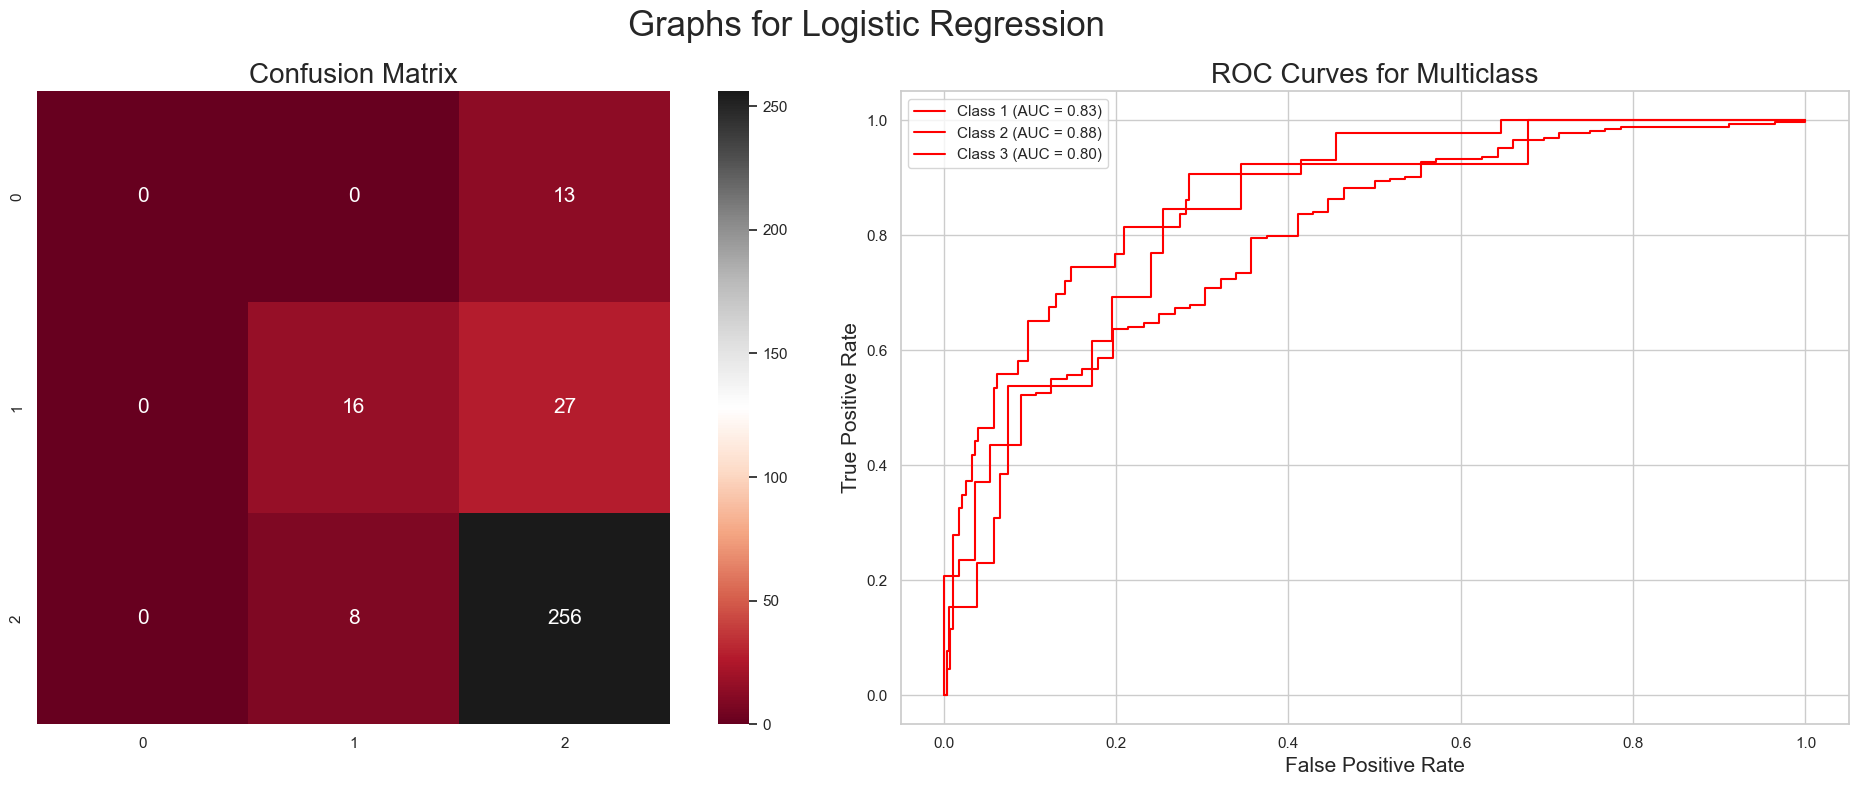

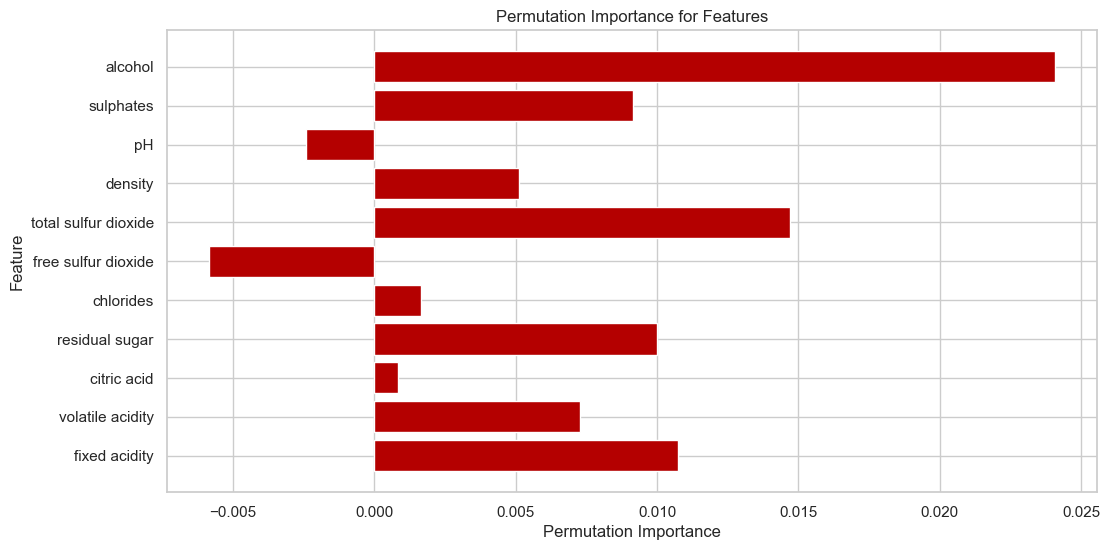

In [33]:
evaluate_model('Logistic Regression',

                           LogisticRegression(C=1.2, fit_intercept=True, 

                                              max_iter=50, penalty = 'l1', solver='saga'))

For Decision Tree Classifier

Training Accuracy: 100.0000 %

Testing Accuracy: 80.3125 %

Accuracy Score: 80.3125 %



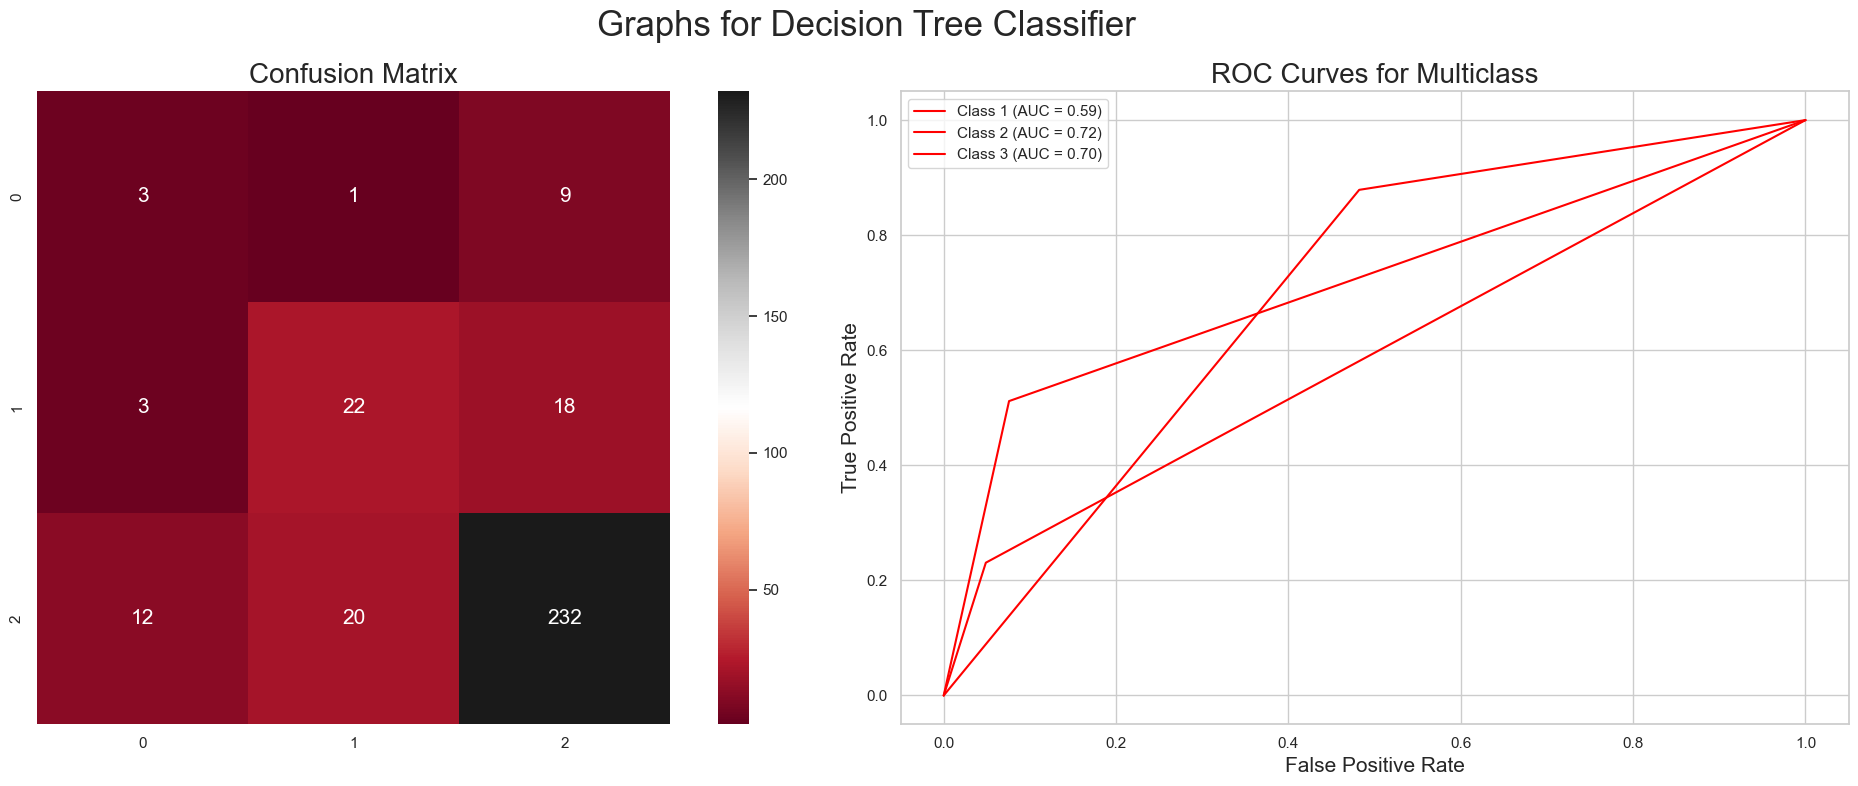

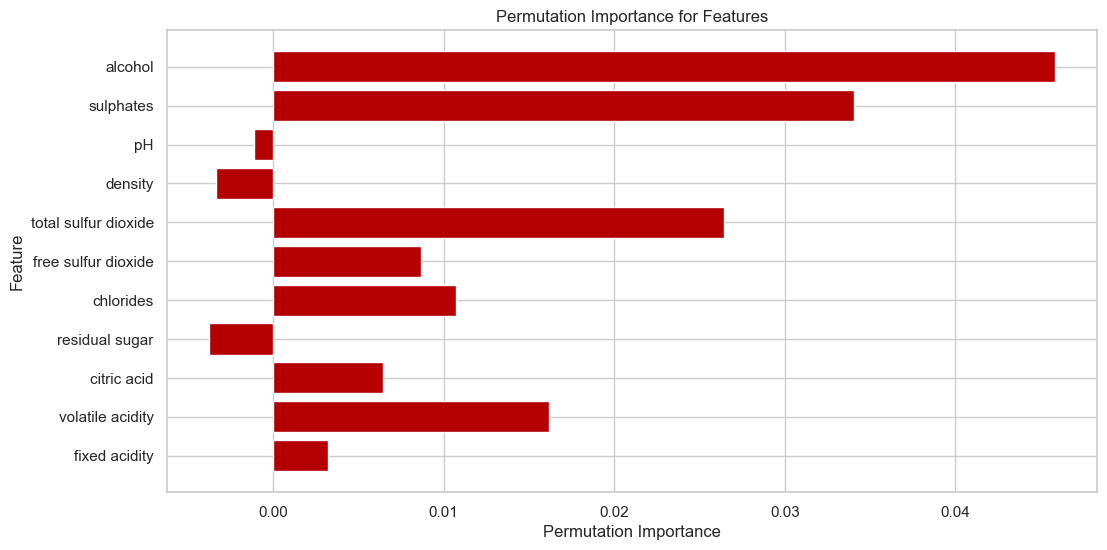

In [34]:
evaluate_model('Decision Tree Classifier',

               DecisionTreeClassifier(criterion = 'entropy',

                                      splitter = 'best', 

                                      max_features=6, max_depth = 20,

                                      max_leaf_nodes=200, random_state = 33))

For Random Forest Classifer

Training Accuracy: 100.0000 %

Testing Accuracy: 88.7500 %

Accuracy Score: 88.7500 %



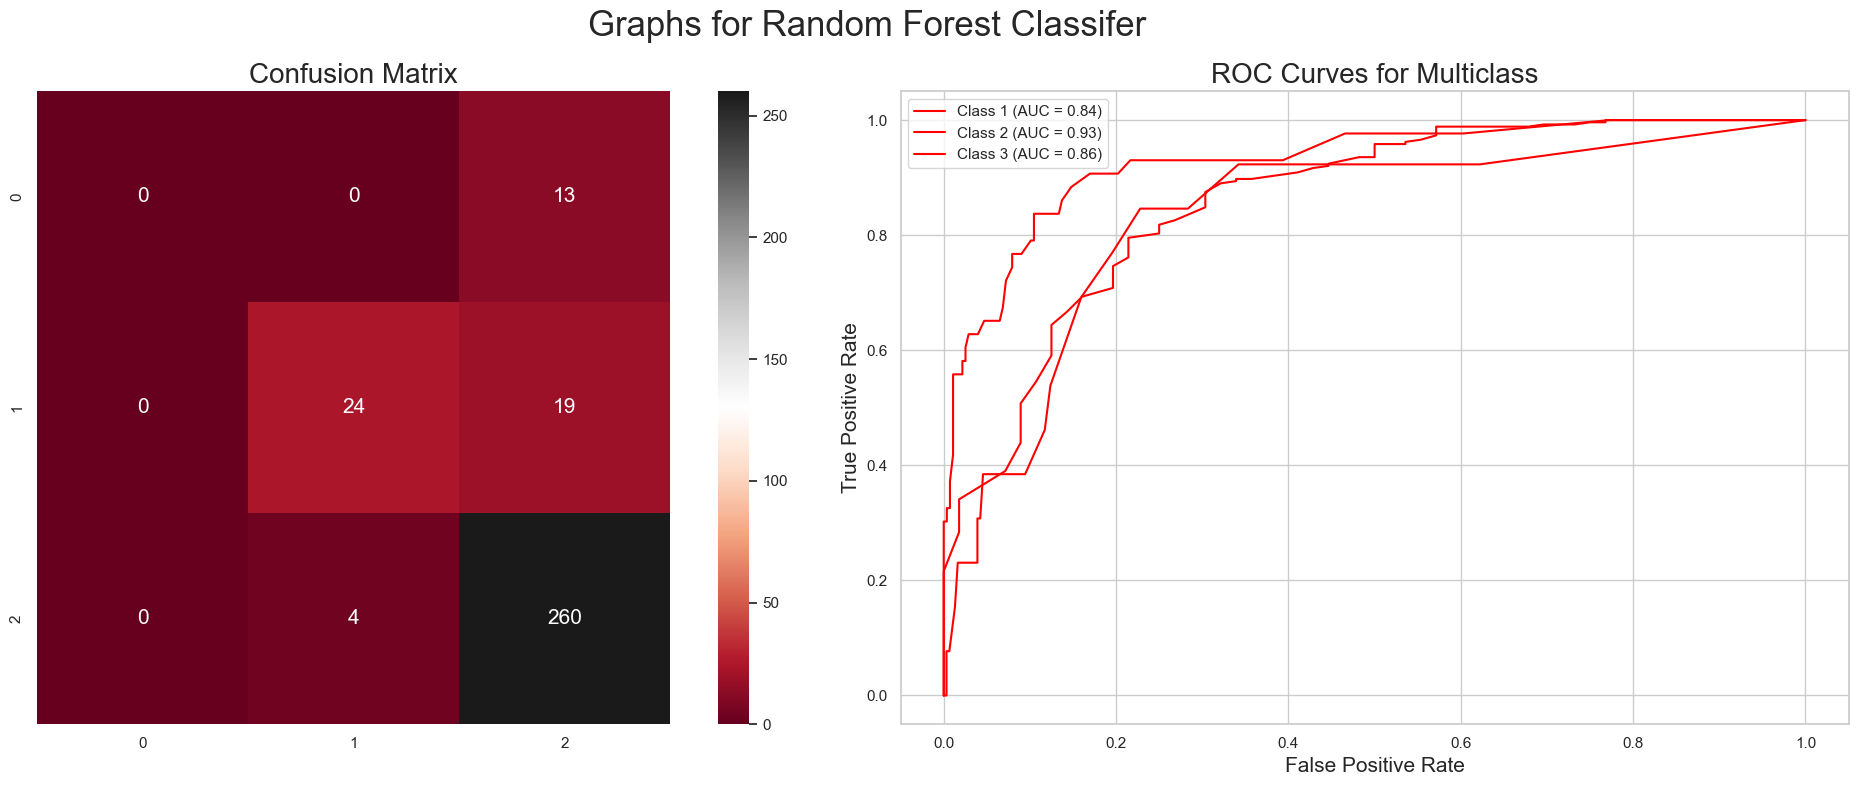

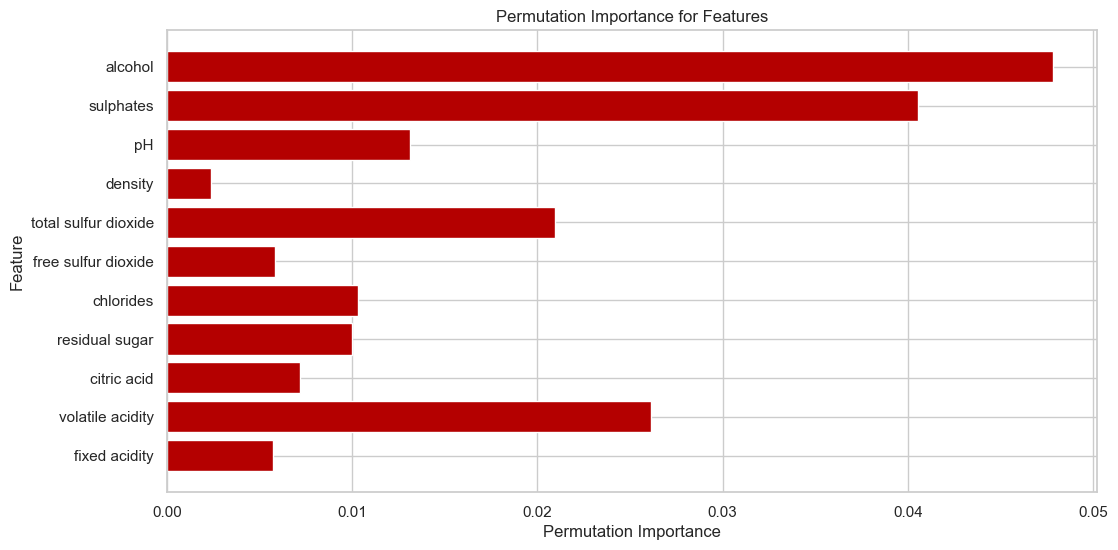

In [35]:
evaluate_model('Random Forest Classifer', 

               RandomForestClassifier(criterion = 'gini', max_depth = 30, 

                                      max_features ='sqrt', n_estimators = 100,

                                      random_state = 33))

For Support Vector Classifier

Training Accuracy: 86.0829 %

Testing Accuracy: 86.8750 %

Accuracy Score: 86.8750 %



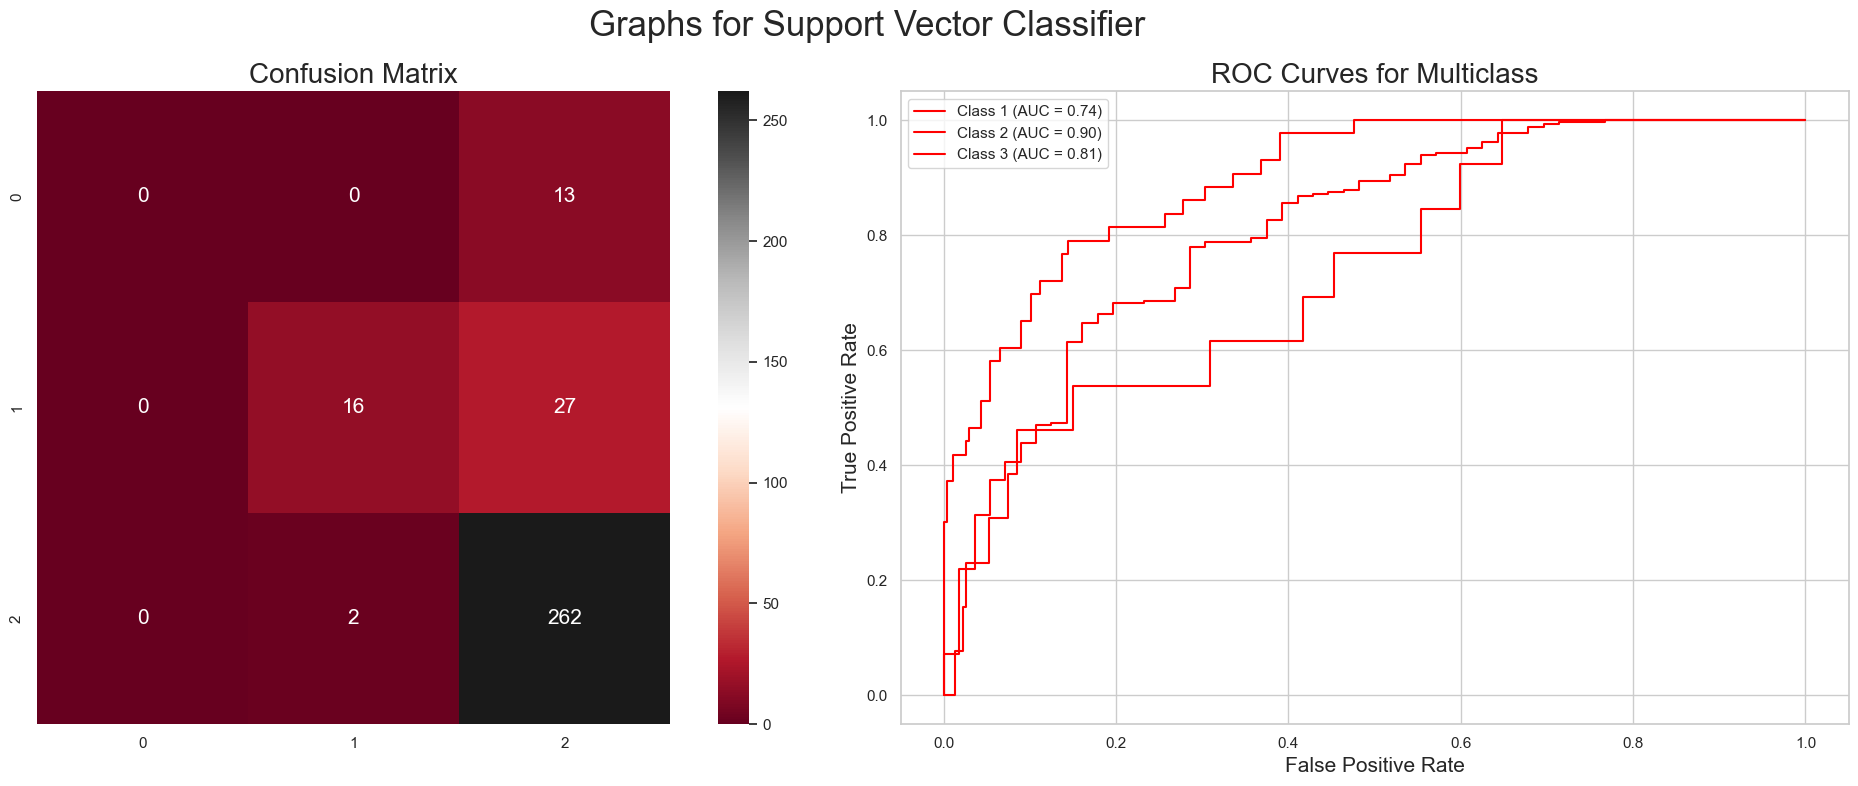

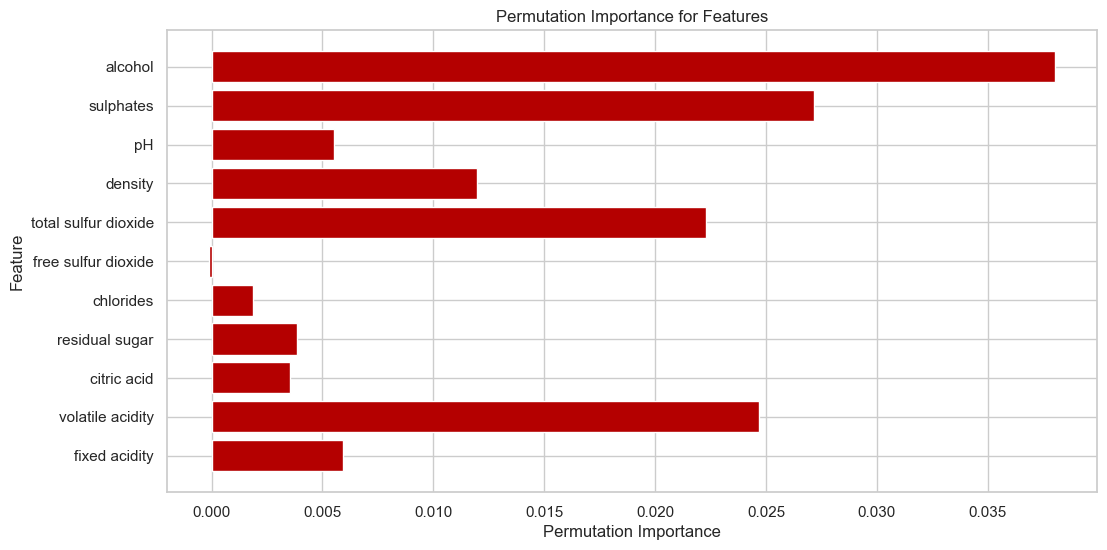

In [36]:
evaluate_model('Support Vector Classifier', SVC( C = 1, gamma = 'auto',

                                                kernel = 'rbf', random_state = 33, probability=True))

For K Nearest Neighbors

Training Accuracy: 100.0000 %

Testing Accuracy: 87.5000 %

Accuracy Score: 87.5000 %



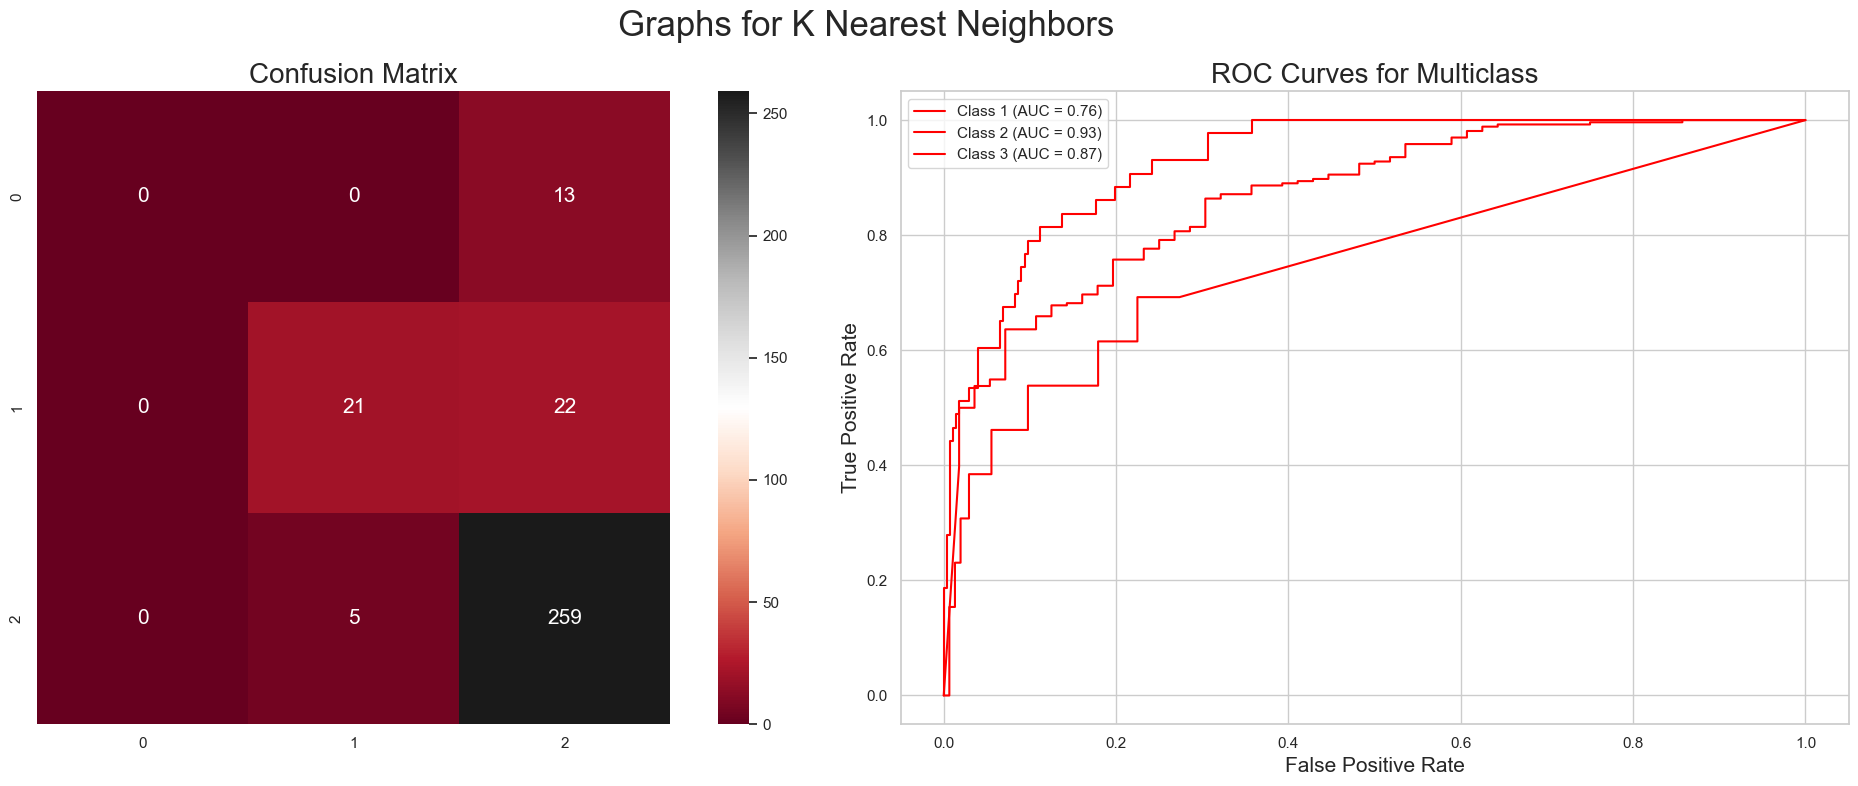

In [37]:
evaluate_model('K Nearest Neighbors', 

               KNeighborsClassifier(algorithm = 'auto',

                                    leaf_size = 20, metric = 'euclidean',

                                    n_jobs = -1, n_neighbors = 25, p = 2,

                                    weights = 'distance'))

In [38]:
GradientBoostingClassifier(

    loss='deviance',  # Default loss for multi-class classification

    learning_rate=0.2,

    max_depth=5,

    min_samples_split=5,

    min_samples_leaf=2,

    subsample=1.0,

    n_estimators=60,

    random_state=33)

GradientBoostingClassifier(learning_rate=0.2, loss='deviance', max_depth=5,
                           min_samples_leaf=2, min_samples_split=5,
                           n_estimators=60, random_state=33)

For Gradient Boosting Classifier

Training Accuracy: 100.0000 %

Testing Accuracy: 86.2500 %

Accuracy Score: 86.2500 %



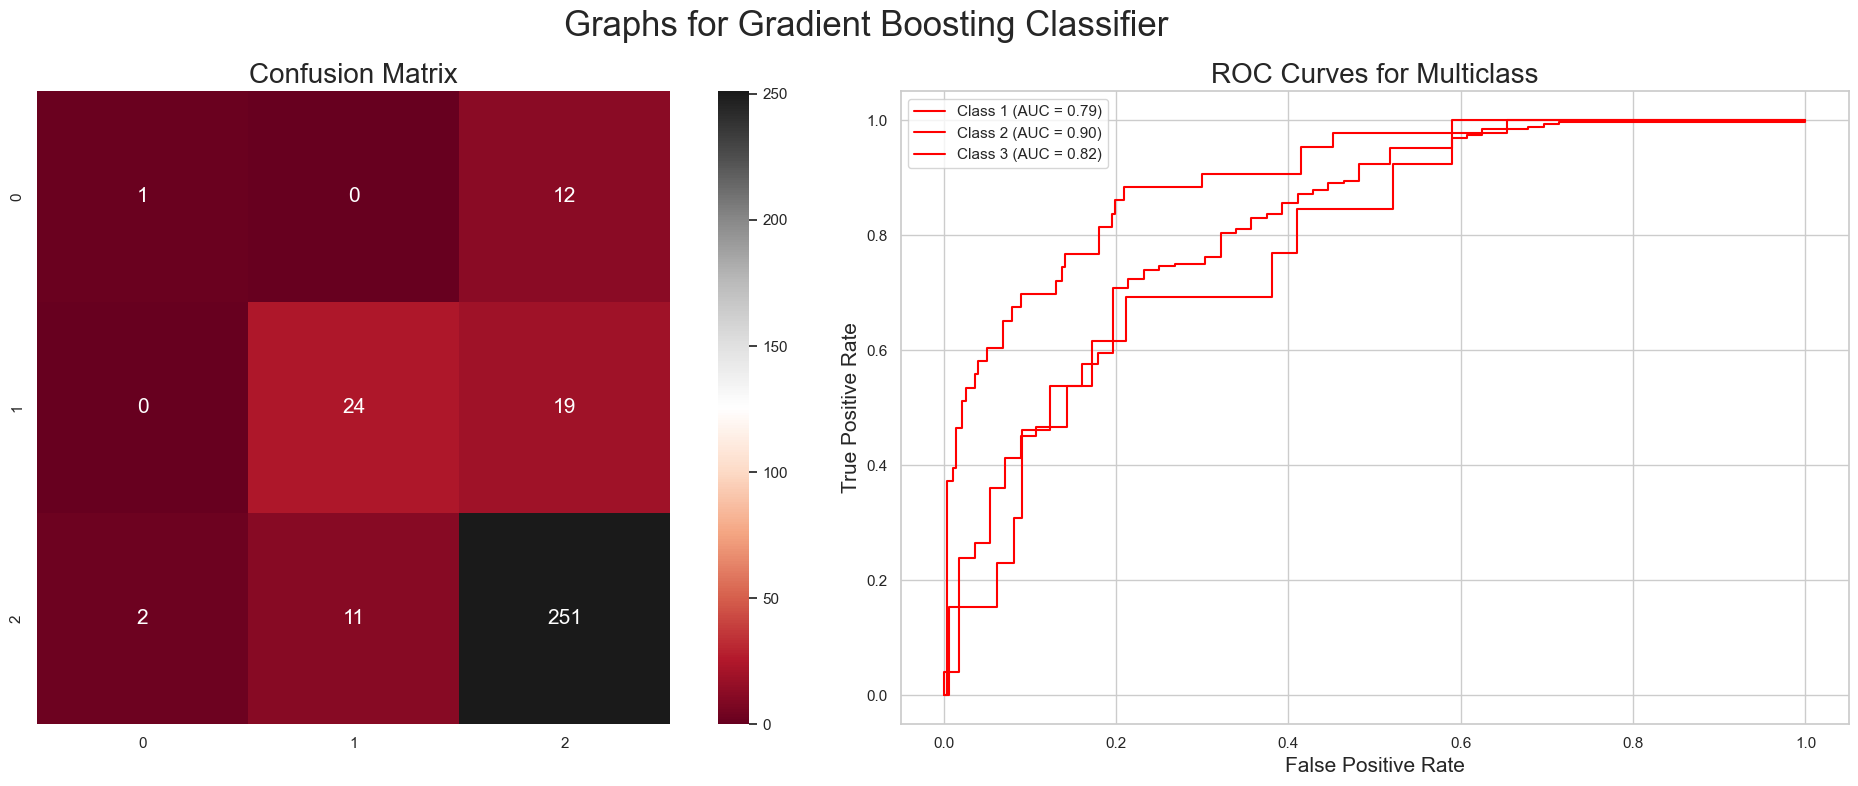

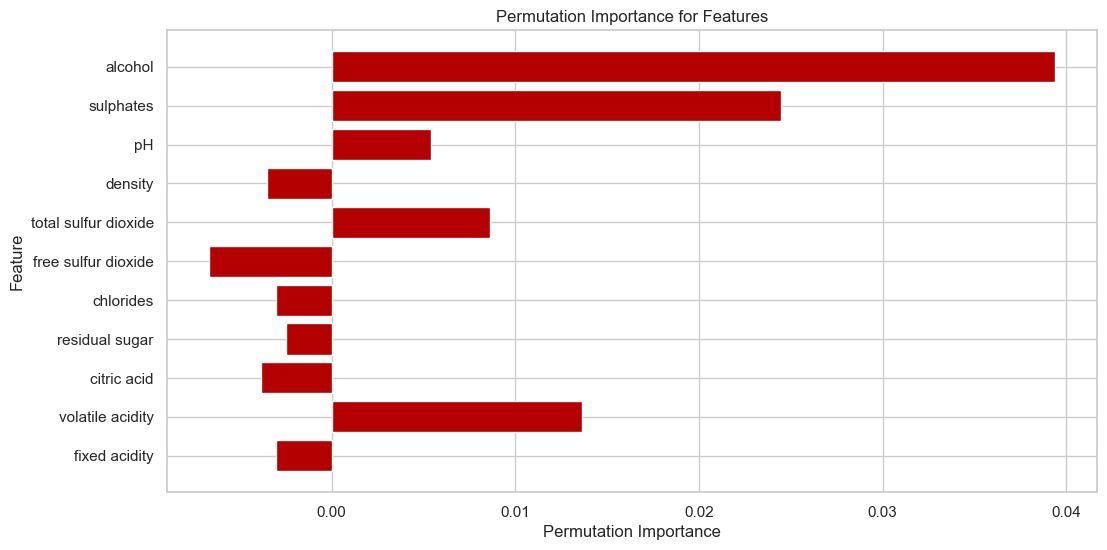

In [39]:
evaluate_model('Gradient Boosting Classifier', 

               GradientBoostingClassifier( loss = 'log_loss',learning_rate = 0.2, max_depth = 5,

                                          min_samples_split = 5, min_samples_leaf = 2,

                                          subsample= 1.0,

                                          n_estimators = 60, random_state = 33))

For XGBoost Classifier

Training Accuracy: 100.0000 %

Testing Accuracy: 88.4375 %

Accuracy Score: 88.4375 %



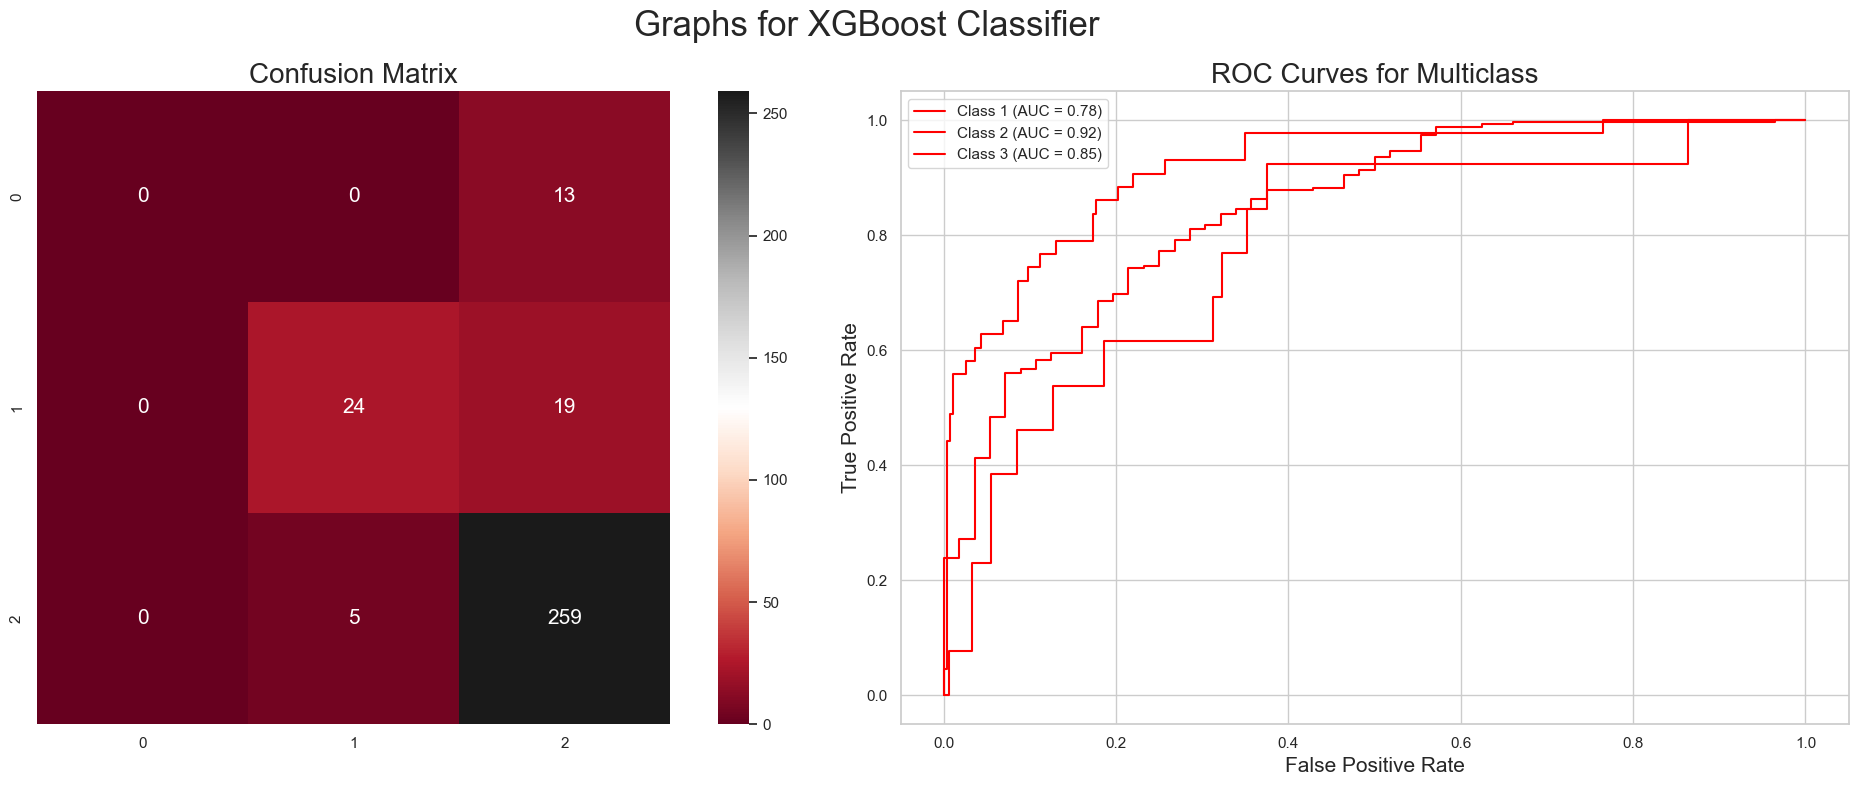

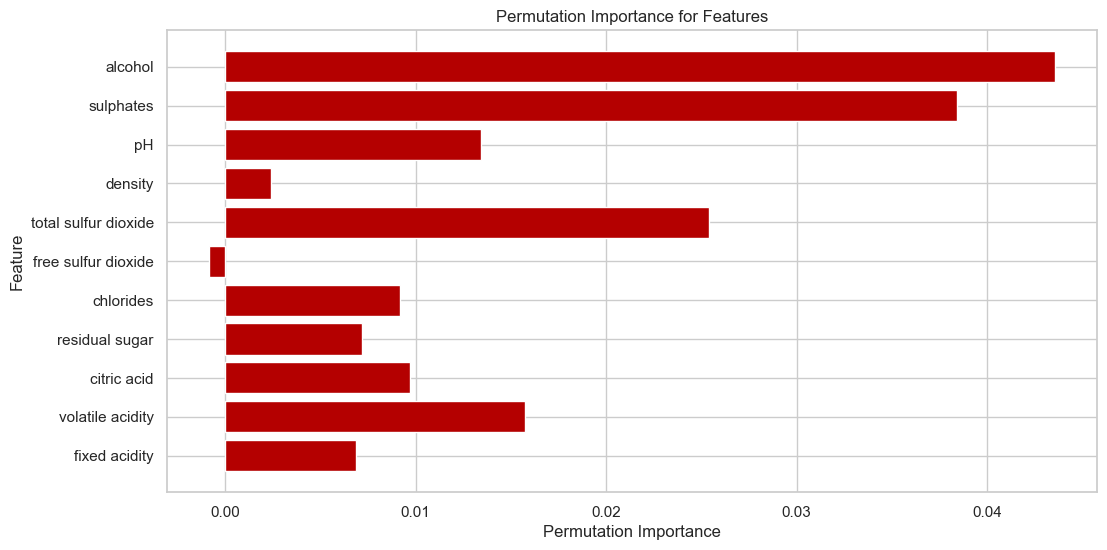

In [40]:
evaluate_model('XGBoost Classifier', XGBClassifier(

    booster='gbtree',

    gamma = 0.09,

    learning_rate=0.15,

    n_estimators=200,

    max_depth=13,

    min_child_weight=1,

    subsample=0.8,

    colsample_bytree=0.8,

    objective='binary:logistic',  # or 'multi:softmax' 

    random_state=33))

For Light Gradient Boosting Machine

Training Accuracy: 100.0000 %

Testing Accuracy: 88.1250 %

Accuracy Score: 88.1250 %



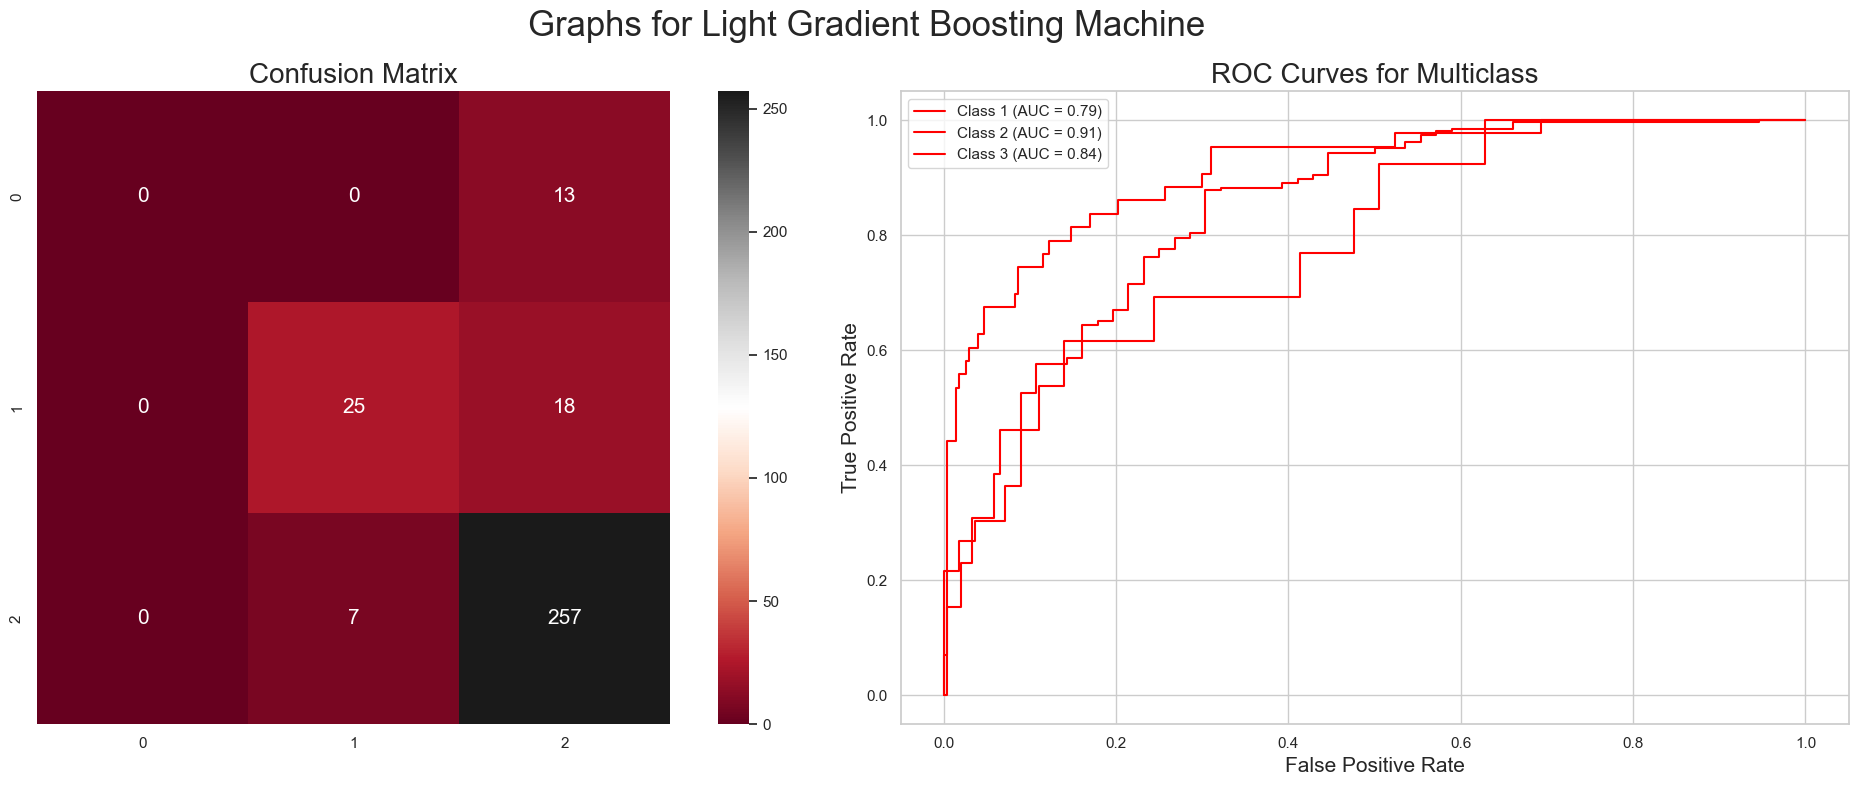

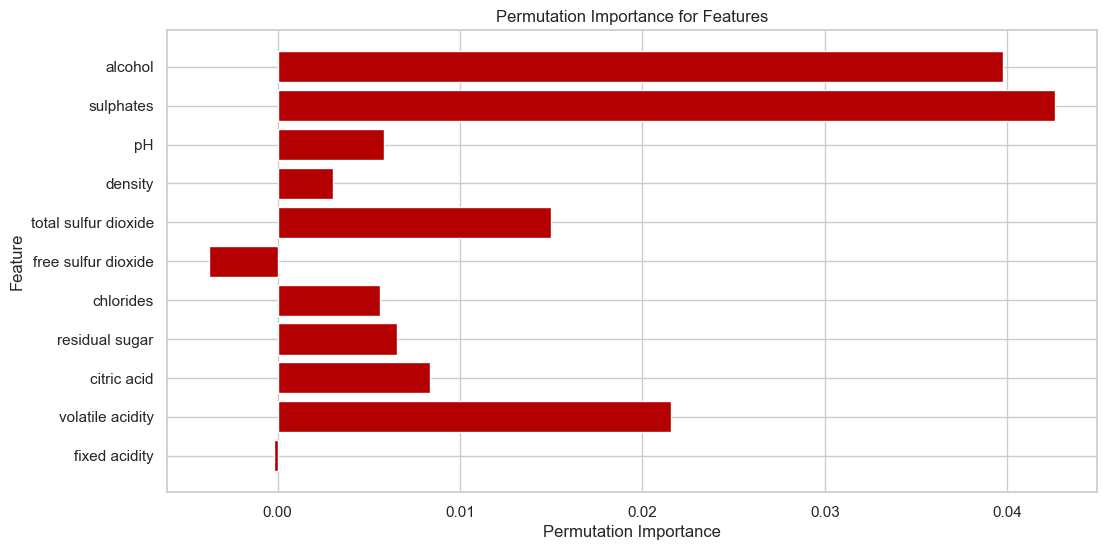

In [41]:
evaluate_model('Light Gradient Boosting Machine', lgbm.LGBMClassifier(

    boosting_type='gbdt',

    learning_rate=0.1,

    n_estimators=110,

    max_depth=15,

    num_leaves = 40,

    min_child_weight = 1,

    subsample=0.8,

    colsample_bytree=0.8,

    reg_alpha = 0.0, 

    reg_lambda = 0.1,

    random_state=33,

    verbose=-1))    

In [45]:
import sklearn
print(sklearn.__version__)

1.6.1


For AdaBoost Classifier

Training Accuracy: 83.9719 %

Testing Accuracy: 84.0625 %

Accuracy Score: 84.0625 %



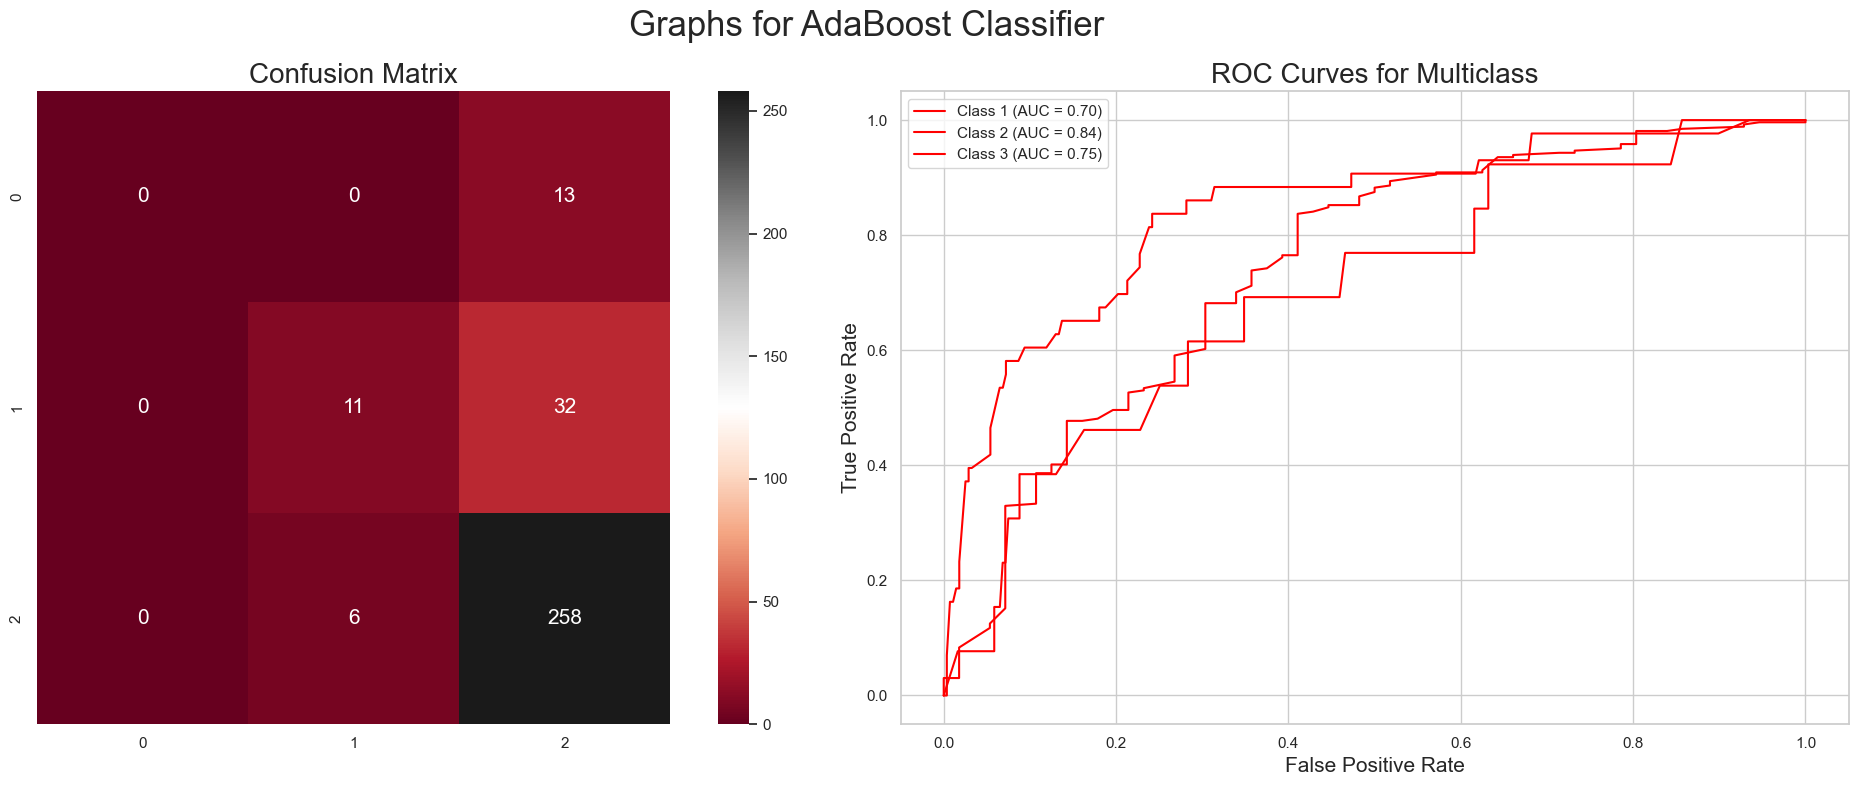

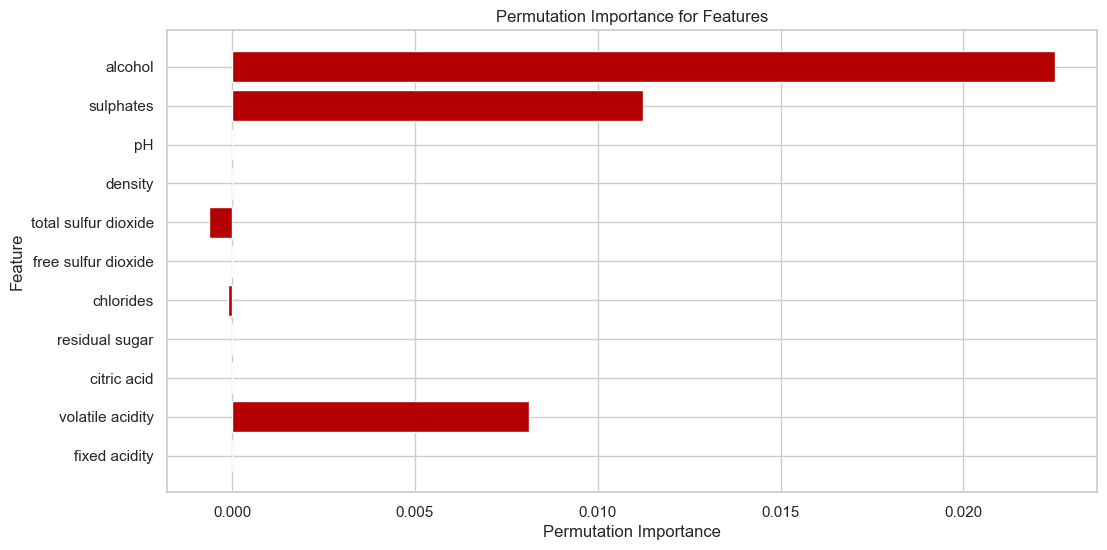

In [48]:

model = AdaBoostClassifier(
    #$base_estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=150,  
    learning_rate=0.1,
    random_state=33)

evaluate_model('AdaBoost Classifier', model)

0:	learn: 0.9881071	total: 144ms	remaining: 1m 11s
100:	learn: 0.2698545	total: 327ms	remaining: 1.29s
200:	learn: 0.1828981	total: 500ms	remaining: 744ms
300:	learn: 0.1296239	total: 664ms	remaining: 439ms
400:	learn: 0.0984841	total: 828ms	remaining: 204ms
499:	learn: 0.0759821	total: 986ms	remaining: 0us
For CatBoost Classifier

Training Accuracy: 99.2963 %

Testing Accuracy: 86.8750 %

Accuracy Score: 86.8750 %



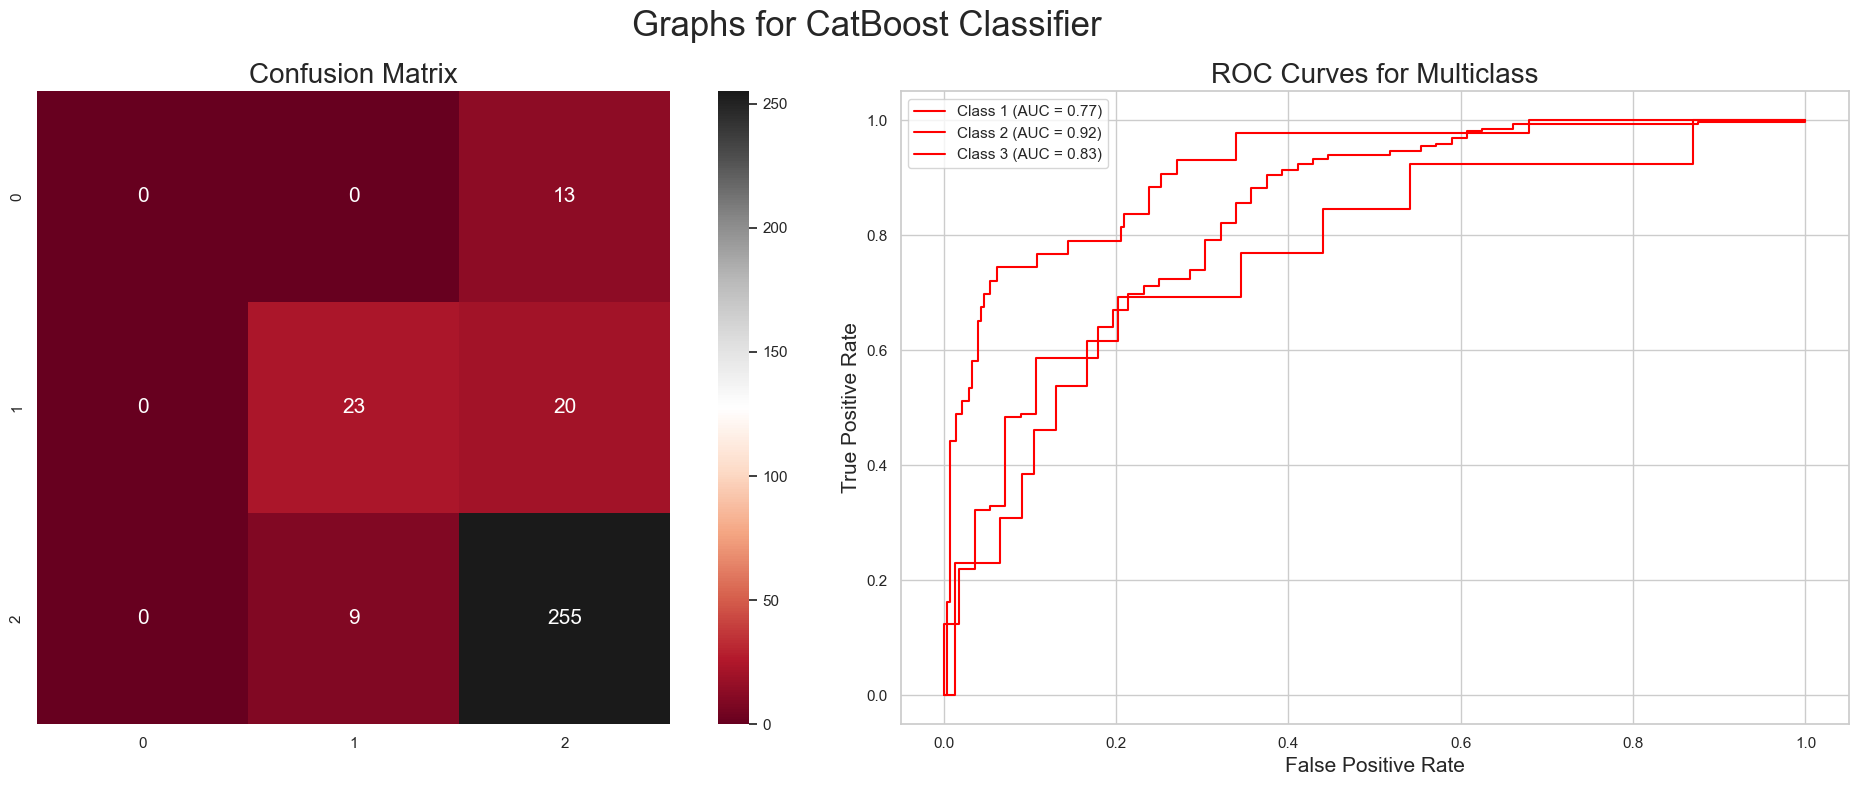

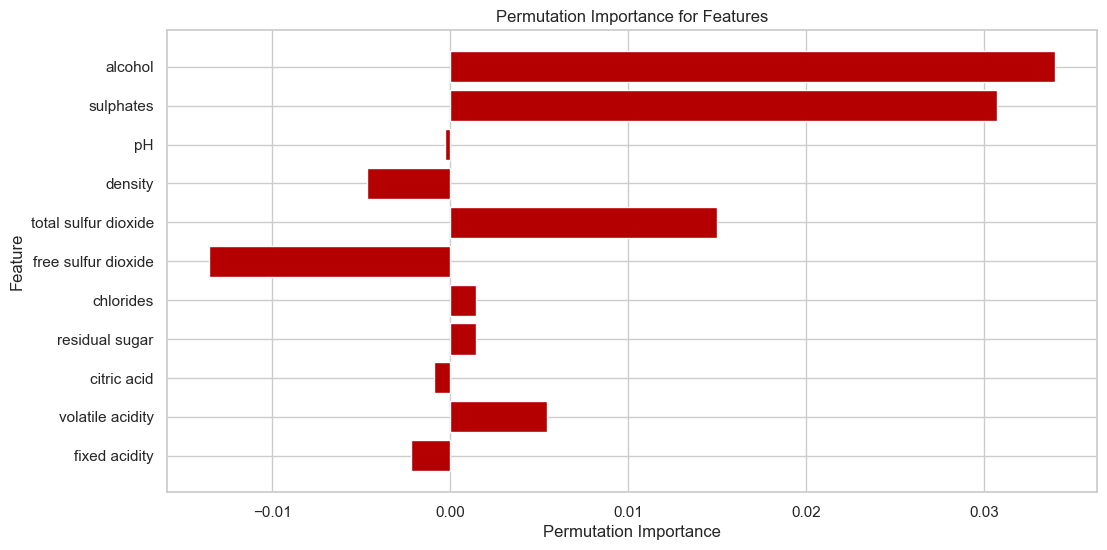

In [47]:
model = CatBoostClassifier(

    iterations=500,        

    learning_rate=0.1,     

    depth=6,                

    random_seed=33,

    verbose=100)

evaluate_model('CatBoost Classifier', model)

In [49]:
comparison = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive',

                                               'True Negative','False Negative',

                                               'Accuracy (Training)', 'Accuracy (Test)'])

comparison

Model  True Positive  False Positive  \
0              Logistic Regression              0               0   
1         Decision Tree Classifier              3               1   
2          Random Forest Classifer              0               0   
3        Support Vector Classifier              0               0   
4              K Nearest Neighbors              0               0   
5     Gradient Boosting Classifier              1               0   
6               XGBoost Classifier              0               0   
7  Light Gradient Boosting Machine              0               0   
8              CatBoost Classifier              0               0   
9              AdaBoost Classifier              0               0   

   True Negative  False Negative  Accuracy (Training)  Accuracy (Test)  
0             16               0             0.845192         0.850000  
1             22               3             1.000000         0.803125  
2             24               0             1.000000         0.887500  
3             16               0             0.860829         0.868750  
4             21               0             1.000000         0.875000  
5             24               0             1.000000         0.862500  
6             24               0             1.000000         0.884375  
7             25               0             1.000000         0.881250  
8             23               0             0.992963         0.868750  
9             11               0             0.839719         0.840625

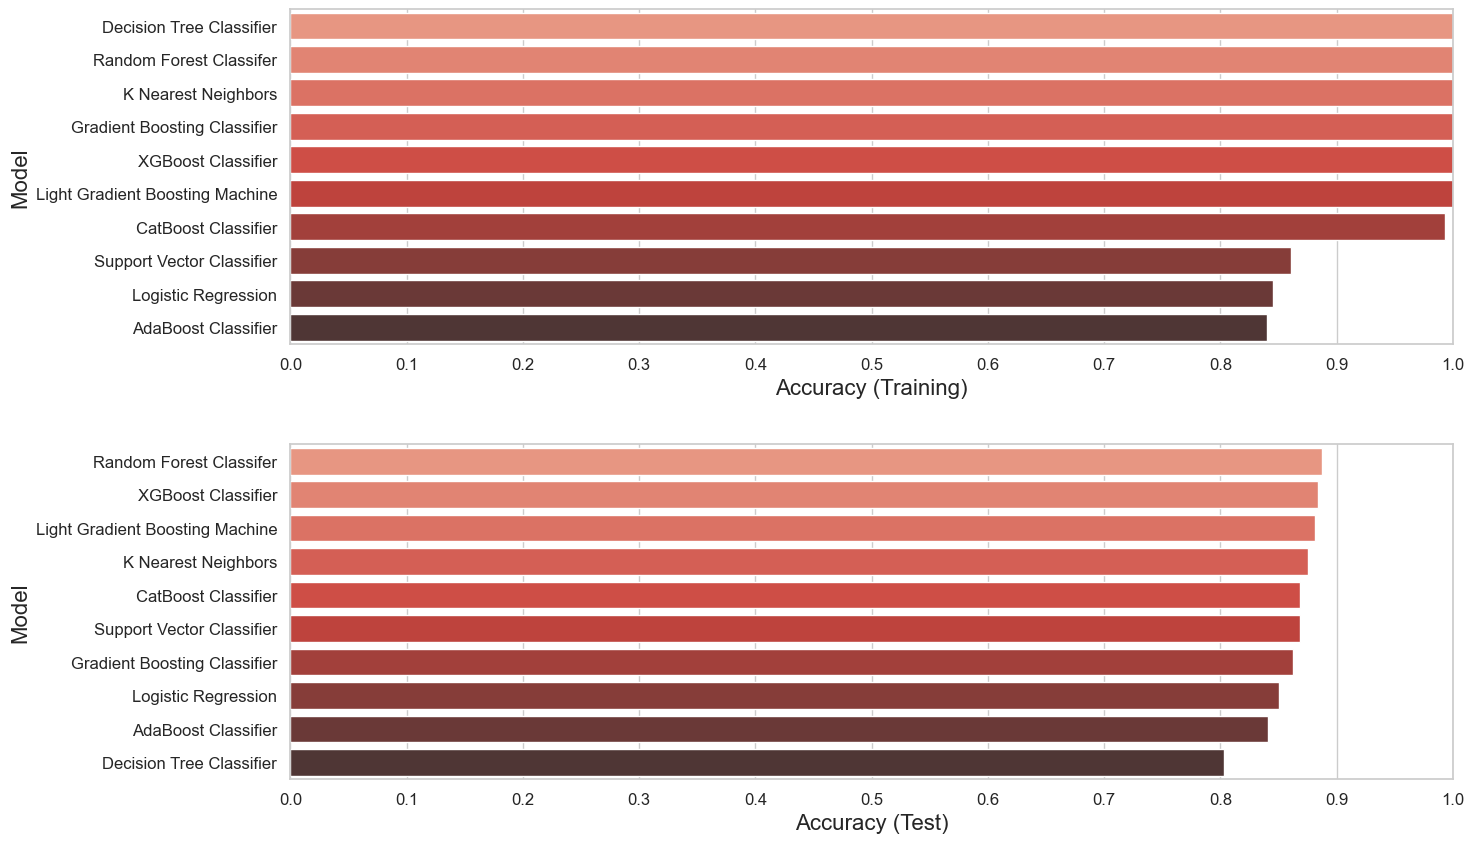

In [50]:
plt.figure(figsize=(15, 10))



plt.subplot(2, 1, 1)

comparison.sort_values(by=['Accuracy (Training)'], ascending=False, inplace=True)



sns.barplot(x='Accuracy (Training)', y='Model', data=comparison, palette='Reds_d') 

plt.xlabel('Accuracy (Training)', size=16)

plt.ylabel('Model', size=16)

plt.xlim(0, 1.0)

plt.xticks(np.arange(0, 1.1, 0.1), size=12)

plt.yticks(size=12)



plt.subplot(2, 1, 2)

comparison.sort_values(by=['Accuracy (Test)'], ascending=False, inplace=True)



sns.barplot(x='Accuracy (Test)', y='Model', data=comparison, palette='Reds_d')  

plt.xlabel('Accuracy (Test)', size=16)

plt.ylabel('Model', size=16)

plt.xlim(0, 1.0)

plt.xticks(np.arange(0, 1.1, 0.1), size=12)

plt.yticks(size=12)

plt.subplots_adjust(hspace=0.3)

plt.show()

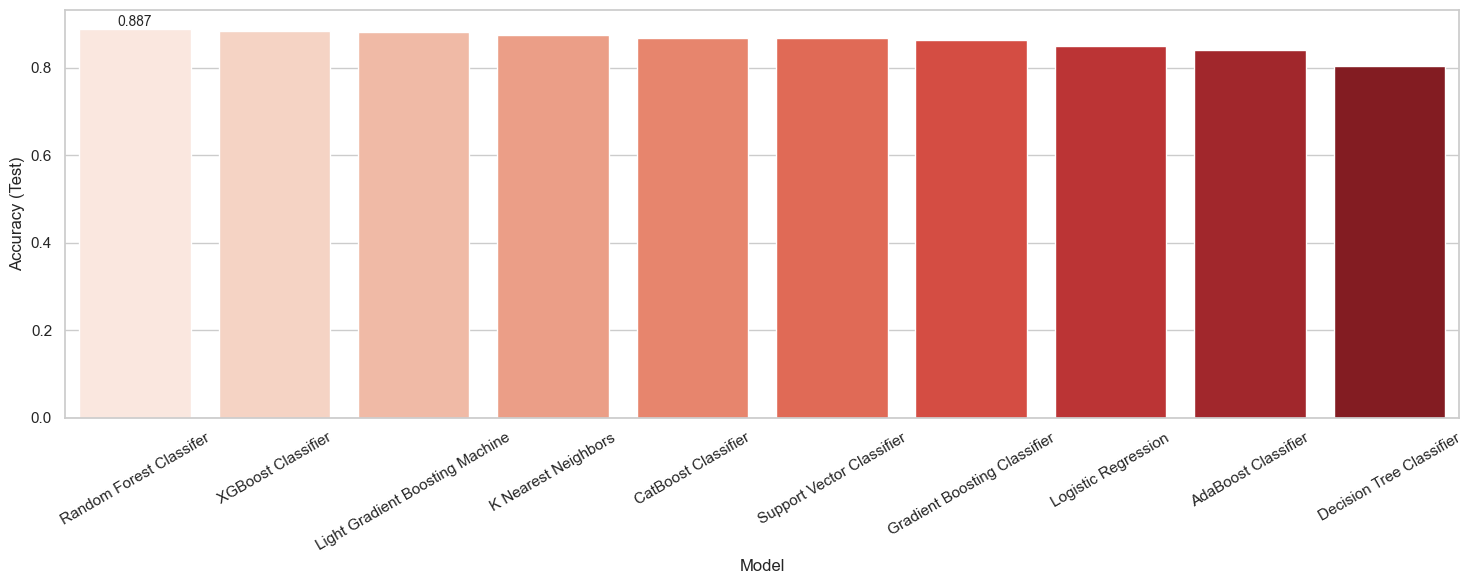

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))



sns.barplot(x='Model', y='Accuracy (Test)', data=comparison, ax=ax, palette='Reds')

ax.bar_label(ax.containers[0], fmt='%.3f', size=10)



for label in ax.get_xticklabels():

    label.set_rotation(30)



plt.tight_layout()

plt.show()

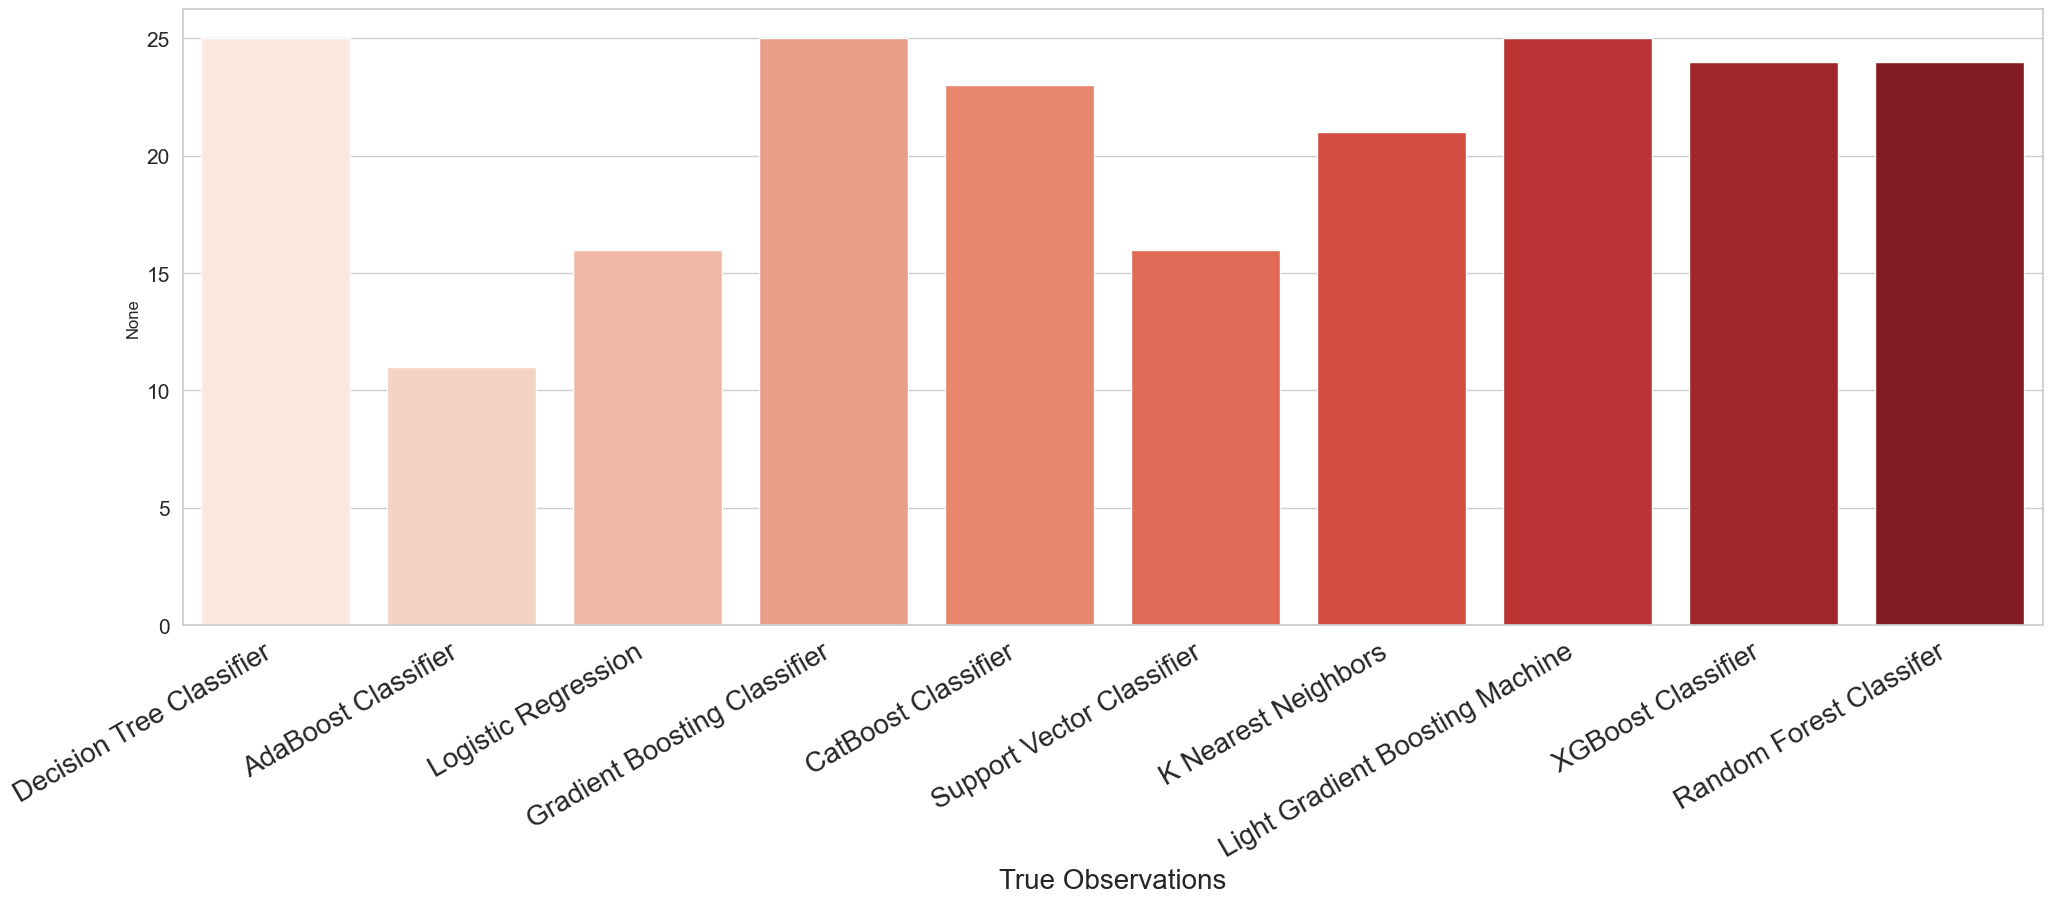

In [52]:
plt.figure(figsize=(24,8))

comparison.sort_values(by=(['Accuracy (Test)']), ascending=True, inplace=True)

sns.barplot(x = comparison['Model'], y=comparison['True Positive'] + comparison['True Negative'], palette='Reds')

plt.xlabel('Model', size=30)

plt.xticks(size=20, rotation=30, ha='right')

plt.xlabel('True Observations', size=20)

plt.yticks(size=15)

plt.show()